The button below hides all code cells. Execute it and toggle the button to show/hide the code.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Configuring the environment

The starting point of these instructions is having an [anaconda](https://www.anaconda.com/products/distribution) installation. It includes `conda` for managing the environments and installing packages and `jupyter-notebook` for executing this notebook (this is not the only way to run a Jupyter notebook).

The instructions below describe how to create a `conda` environment with the necessary packages and connect this notebook to a kernel that is linked to this `conda` environment.

Unfortunately, `fipy`, one of the packages we need, is not yet available for Apple M2 chips (`osx-arm64` architecture and conda channels). To emulate the standard Intel `osx-64` architecture, run:

```bash
$ CONDA_SUBDIR=osx-64 conda create -n myenv_x86 python=3.9
$ conda activate myenv_x86
(myenv_x86) $ conda config --env --set subdir osx-64
```

After that, `fipy` can be installed as follows (on other platforms, the steps above may not be necessary):
```bash
(myenv_x86) $ conda install -c conda-forge fipy
```

Since this is a fresh installation, the other packages that the Python code depends on must also be installed.
```bash
(myenv_x86) $ conda install -c conda-forge tqdm matplotlib pandas scikit-learn statsmodels
```

After that, this new conda environment must be made visible to `jupyter-notebook`.
```bash
(myenv_x86) $ conda install -c anaconda ipykernel
(myenv_x86) $ python3 -m ipykernel install --user --name=myenv_x86
```

After that, select `myenv_x86` kernel when launching this Jupyter notebook. If `jupyer-notebook` is used, this can be done in Kernel -> Change kernel. Note: for some reason, `jupyter-notebook` is not visible inside this environment in my setup, so I run jupyter-notebook from a "fresh" Terminal window.

Navigate down to [Fokker-Planck prediction](#Fokker-Planck-prediction).

Note: as I mention below, the scaling laws code for the jumping OU model (full BP with limited iterations) and for the Fokker-Planck model (sliding window with limited iterations) takes up an insane amount of RAM. On my current Macbook Pro 2022 with the M2 chip, it kills the kernel. This wasn't the case for my previous laptop, Macbook Pro 2017 with the Intel chip (I no longer have access to that laptop). The data provided in this repository are generated using the previous laptop. The repository will be updated once I find a way to plug the memory leak. (The source code for all scaling laws is already available.)

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from fl_scaling.est_scaling_params import *

# Estimating $\breve{\alpha}, \tilde{\alpha}, \tilde{\beta}, \breve{\gamma}, V_\mathsf{PD}$ from Mean Evolution

In [4]:
## ESTIMATING THE BEGINNING AND THE END OF THE STEADY STATE FOR THE TRUNCATED ENSEMBLE
## BEGINNING OF SS: 'taustar' in the code, '\breve{alpha}' in the papers
## END OF SS: 'endstar' in the code, not used in the papers

## The file below has already been generated. To re-generate the file, uncomment and execute this cell.
## The estimation is done from Mean Evolution (ME), implemented in fl_scaling.mean_evolution.steps_sc_ldpc

# from fl_scaling.mean_evolution import steps_sc_ldpc
# from fl_scaling.est_scaling_params import *

# # gstar is the Density Evolution (DE) threshold for the BEC
# # called 'gstar' not 'estar' (epsilon star) for historical reasons: originally the code was written
# # for Coded Slotted Aloha (CSA), which can be viewed as a kind of spatially coupled factor graph system.
# # In the context of CSA, system load, typically denoted by 'g', is the equivalent of the BEC erasure probability.
# # The DE threshold can be calculated using, e.g.,
# # fl_scaling.density_evolution.sc_ldpc_threshold_load(4, 8, 50)
# # The usage is showcased in fl_scaling.density_evolution.test_de_sc_ldpc()
# gstar = 0.49774

# N = 10000
# L = 50

# start = 0.45
# stop = 0.485

# gs = np.linspace(start, stop, 10)
# tstars = []
# endstars = []
# for g in gs:
#     r1s = steps_sc_ldpc(e=g, s=4, m=N, w=L, frame_len=4, is_terminated=False)[0]
#     ssstart, ssstop = find_level_robust(r1s, N, gstar, g, 1e-2)
#     tstars.append(ssstart)
#     endstars.append(ssstop)
#     print(g, ssstart, ssstop)
# with open('data/taustar_endstar_ldpc_4_8_nonterminated.dat', 'wb') as f:
#     pickle.dump((gs, tstars, endstars), f)

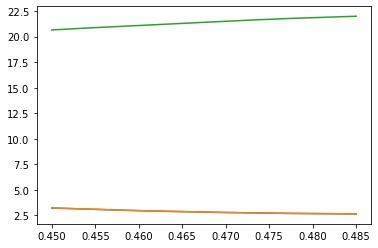

In [5]:
with open('data/taustar_endstar_ldpc_4_8_nonterminated.dat', 'rb') as f:
    gs, tstars, endstars = pickle.load(f)

start = 0.45
stop = 0.485
L = 50

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
taustar_interp_ldpc = interp1d(gs, tstars)
endstar_interp_ldpc = interp1d(gs, endstars)

plt.plot(gs, tstars)
plt.plot(x, taustar_interp_ldpc(x))
plt.plot(x, endstar_interp_ldpc(x))

plt.show()

In [6]:
## ESTIMATING THE BEGINNING AND THE END OF THE STEADY STATE FOR THE *TERMINATED* ENSEMBLE
## BEGINNING OF SS: 'taustar' in the code, '\tilde{alpha}' in the papers
## END OF SS: 'endstar' in the code, '\tilde{beta}' in the papers

## The file below has already been generated. To re-generate the file, uncomment and execute this cell.
## The estimation is done from Mean Evolution (ME), implemented in fl_scaling.mean_evolution.steps_sc_ldpc

# from fl_scaling.mean_evolution import steps_sc_ldpc
# from fl_scaling.est_scaling_params import *

# gstar = 0.49774

# N = 10000
# L = 50

# start = 0.45
# stop = 0.485

# gs = np.linspace(start, stop, 10)
# tstars = []
# endstars = []
# for g in gs:
#     r1s = steps_sc_ldpc(e=g, s=4, m=N, w=L, frame_len=4, is_terminated=True)[0]
#     ssstart, ssstop = find_level_robust(r1s, N, gstar, g, 1e-2)
#     tstars.append(ssstart)
#     endstars.append(ssstop)
#     print(g, ssstart, ssstop)
# with open('data/taustar_endstar_ldpc_4_8_terminated.dat', 'wb') as f:
#     pickle.dump((gs, tstars, endstars), f)

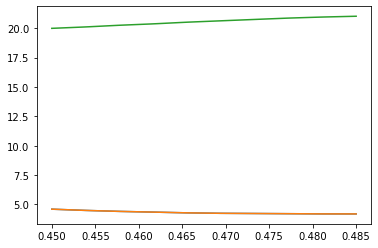

In [7]:
with open('data/taustar_endstar_ldpc_4_8_terminated.dat', 'rb') as f:
    gs, tstars, endstars = pickle.load(f)

start = 0.45
stop = 0.485
L = 50

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
taustar_interp_ldpc_term = interp1d(gs, tstars)
endstar_interp_ldpc_term = interp1d(gs, endstars)

plt.plot(gs, tstars)
plt.plot(x, taustar_interp_ldpc_term(x))
plt.plot(x, endstar_interp_ldpc_term(x))

plt.show()

In [8]:
## ESTIMATING THE LEVEL OF THE STEADY STATE FOR THE *TRUNCATED* ENSEMBLE
## LEVEL OF SS: 'gamma' in the code, '\breve{gamma}' in the papers

## The file below has already been generated. To re-generate the file, uncomment and execute this cell.
## The estimation is done from Mean Evolution (ME), implemented in fl_scaling.mean_evolution.steps_sc_ldpc

# from fl_scaling.mean_evolution import steps_sc_ldpc
# from fl_scaling.est_scaling_params import *

# gstar = 0.49774

# N = 2000
# L = 50

# start = 0.45
# stop = 0.485

# gs = np.linspace(start, stop, 10)
# gammas = []
# for g in gs:
#     r1s = steps_sc_ldpc(e=g, s=4, m=N, w=L, frame_len=4, is_terminated=False)[0]
#     lvl, _ = find_level(r1s)
#     ag = calc_gamma(lvl, N, gstar, g)
#     gammas.append(ag)
#     print(ag)

# with open('data/gammas_ldpc_4_8_nonterminated.dat', 'wb') as f:
#     pickle.dump((gs, gammas), f)

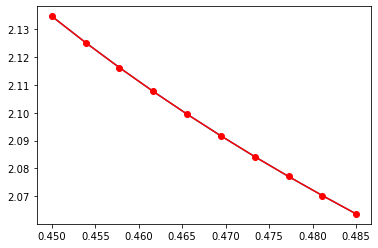

In [9]:
with open('data/gammas_ldpc_4_8_nonterminated.dat', 'rb') as f:
    gs, gammas = pickle.load(f)

start = 0.45
stop = 0.485

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
gammaf = interp1d(gs, gammas)

plt.plot(x, gammaf(x))
plt.plot(gs, gammas, 'r-o')

plt.show()

In [10]:
## ESTIMATING THE SPEED OF THE WAVE DURING THE STEADY STATE FOR THE TERMINATED ENSEMBLE
## LEVEL OF SS: 'vss' in the code, 'V_PD' in the papers
## Notably, the speed of the single decoding wave in the truncated ensemble is the same
## as the speed of two decoding waves jointly in the terminated ensemble. The two waves
## move two times slower in the terminated ensemble than the single wave moves in the truncated ensemble.
## This is because the peeling decoder can be thought to pick a deg-1 CN randomly for the left and right
## wave, whereas in the truncated ensemble it always picks the CNs for the left wave.

## The file below has already been generated. To re-generate the file, uncomment and execute this cell.
## The estimation is done from Mean Evolution (ME), implemented in fl_scaling.mean_evolution.steps_sc_ldpc

# from fl_scaling.mean_evolution import steps_sc_ldpc

# N = 10000
# L = 50
# midway_point = 25

# start = 0.45
# stop = 0.485
# gs = np.linspace(start, stop, 10)

# vss = []
# for g in gs:
#     _, _, _, v_total, _ = steps_sc_ldpc(e=g, s=4, m=N, w=L, frame_len=4, is_terminated=True)

#     ss_point = int(N * 0.5 * (taustar_interp_ldpc_term(g) + endstar_interp_ldpc_term(g)))
#     vs_ss_point = v_total[ss_point, midway_point]
#     vs_ss_point_norm = vs_ss_point / N

#     vs = 1 / vs_ss_point_norm
#     vss.append(vs)
#     print(g, vs)

# with open('data/vss_ldpc_4_8_terminated.dat', 'wb') as f:
#     pickle.dump((gs, vss), f)

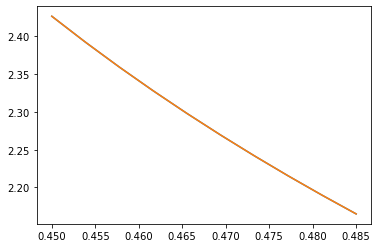

In [11]:
start = 0.45
stop = 0.485

with open('data/vss_ldpc_4_8_terminated.dat', 'rb') as f:
    gs, vss = pickle.load(f)

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
vss_interp_ldpc_term = interp1d(gs, vss)

plt.plot(gs, vss)
plt.plot(x, vss_interp_ldpc_term(x))
plt.show()

# Scaling laws for full BP and SW decoding with unlimited iterations

In [12]:
# Calculating taustar, endstar for other L from the values for L=50
def num_vns_mid(eps):
    return eps - vss_interp_ldpc_term(eps)**(-1)

def taustar_calc_term(eps, L):
    return taustar_interp_ldpc_term(eps) + (L - 50) * num_vns_mid(eps)

def taustar_calc_nonterm(eps, L):
    return taustar_interp_ldpc(eps) + (L - 50) * num_vns_mid(eps)

def endstar_calc_term(eps, L):
    return eps * L - (eps * 50 - endstar_interp_ldpc_term(eps))

def endstar_calc_nonterm(eps, L):
    return eps * L - (eps * 50 - endstar_interp_ldpc(eps))

In [13]:
from fl_scaling.scaling_laws_full_BP_unlim_iter import *

# The shortcuts below provide the scaling laws for full BP and sliding window decoding
# for unlimited iterations.

# gstar is the Density Evolution (DE) threshold for the BEC
# called 'gstar' not 'estar' (epsilon star) for historical reasons: originally the code was written
# for Coded Slotted Aloha (CSA), which can be viewed as a kind of spatially coupled factor graph system.
# In the context of CSA, system load, typically denoted by 'g', is the equivalent of the BEC erasure probability.
# The DE threshold can be calculated using, e.g.,
# fl_scaling.density_evolution.sc_ldpc_threshold_load(4, 8, 50)
# The usage is showcased in fl_scaling.density_evolution.test_de_sc_ldpc()
gstar = 0.49774

taustar = lambda g: taustar_interp_ldpc_term(g)
endstar = lambda g: endstar_interp_ldpc_term(g)

# 'nu' and 'theta' are the variance and covariance decay constants, respectively.
# They are estimated from a set of Monte-Carlo simulations of peeling decoding
# for the truncated (i.e., single-wave) ensemble as described below (in subsequent cells).
nu = 0.40602377870922296
theta = 1.4635370071083604

def fer_term_4_8(eps, N, L):
    return pb_term(eps, gammaf(eps), nu, theta, gstar, taustar_calc_term(eps,L), endstar_calc_term(eps,L), N, L=L)

def ber_term_4_8(eps, N, L):
    return plr_term_ldpc(eps, gammaf(eps), nu, theta, gstar, taustar_calc_term(eps,L), endstar_calc_term(eps,L), N, L=L)

def bler_term_4_8(eps, N, L):
    return bler_term_ldpc(eps, gammaf(eps), nu, theta, gstar, taustar_calc_term(eps,L), endstar_calc_term(eps,L), vss_interp_ldpc_term(eps), N, L=L)


def fer_nonterm_4_8(eps, N, L):
    return pb(eps, gammaf(eps), nu, theta, gstar, taustar_calc_nonterm(eps,L), eps * L, N, L=L)

def ber_nonterm_4_8(eps, N, L):
    return plr_ldpc(eps, gammaf(eps), nu, theta, gstar, taustar_calc_nonterm(eps,L), eps * L, N, L=L)

def bler_nonterm_4_8(eps, N, L):
    return bler_ldpc(eps, gammaf(eps), nu, theta, gstar, taustar_calc_nonterm(eps,L), eps * L, vss_interp_ldpc_term(eps), N, L=L)


def fer_term_4_8_wd(eps, N, L, W):
    fer_left = fer_nonterm_4_8(eps, N, L - W)
    fer_right = fer_term_4_8(eps, N, W)
    return 1 - (1 - fer_left) * (1 - fer_right)

def ber_term_4_8_wd(eps, N, L, W):
    ber_left = ber_nonterm_4_8(eps, N, L - W)
    ber_right_term = ber_term_4_8(eps, N, W)
    ber_right_nonterm = ber_nonterm_4_8(eps, N, W)
    pr_nonterm = fer_nonterm_4_8(eps, N, L - W)
    return (L - W) / L * ber_left + W / L * (pr_nonterm * ber_right_nonterm + (1 - pr_nonterm) * ber_right_term)

def bler_term_4_8_wd(eps, N, L, W):
    bler_left = bler_nonterm_4_8(eps, N, L - W)
    bler_right_term = bler_term_4_8(eps, N, W)
    bler_right_nonterm = bler_nonterm_4_8(eps, N, W)
    pr_nonterm = fer_nonterm_4_8(eps, N, L - W)
    return (L - W) / L * bler_left + W / L * (pr_nonterm * bler_right_nonterm + (1 - pr_nonterm) * bler_right_term)

def arr(fn, xs, N, L):
    return np.array([fn(x, N, L) for x in xs])

def arrw(fn, xs, N, L, W):
    return np.array([fn(x, N, L, W) for x in xs])

# Full BP with unlimited iterations: scaling law vs simulations

The simulated error rate files have already been generated. To obtain them, run `ber_sim.py` with appropriate arguments as described below.

If anaconda is used, the environment with all the packages needs to be activated before the code can be run from the command line:
```bash
$ conda activate
(base) $ which python3
/Users/USERNAME/opt/anaconda3/bin/python3
```

After that, the code below can be run. It is written in such a way that many instances can be run (e.g., on a cluster), each generating its own output file (the prefix `_0` here indicates that it's the first one we're generating here), and these files can be combined with an `awk` script below.

The script below simulates 1000 trajectories only.

```bash
$ cd simulators_sc_ldpc/peeling_decoding
$ python3 ber_sim.py ../../sim_data/error_rates/sim_4_8_50_1000_blers_0.dat 4 8 50 1000 "np.arange(0.46, 0.48 + 0.0005, 0.0005)" T U B NTB 1000 1000 "{}"
```

Once the individual files are generated (a single file generated above will do), their results can be combined using the script below (assuming the directory is `simulators_sc_ldpc/peeling_decoding` as above):
```bash
$ cd ../../sim_data/error_rates
$ awk 'FNR==1{next} {fbl[$1]+=$6; tbl[$1]+=$7; fbit[$1]+=$8; tgen[$1]+=$9; fblck[$1]+=$10; tblck[$1]+=$11} END{for (e in fbl) print e, fbl[e], tbl[e], fbit[e], tgen[e], fblck[e], tblck[e], fbl[e]/tbl[e], fbit[e]/tgen[e], fblck[e]/tblck[e]}' sim_4_8_50_1000_blers_*.dat | sort -n -k1 > terminated_fer_plr_bler_sc_ldpc_4_8_50_1000.dat
```

The data used for the plots below were generated using a previous version of the scripts; the usage of the final script generated above is included below (commented out).

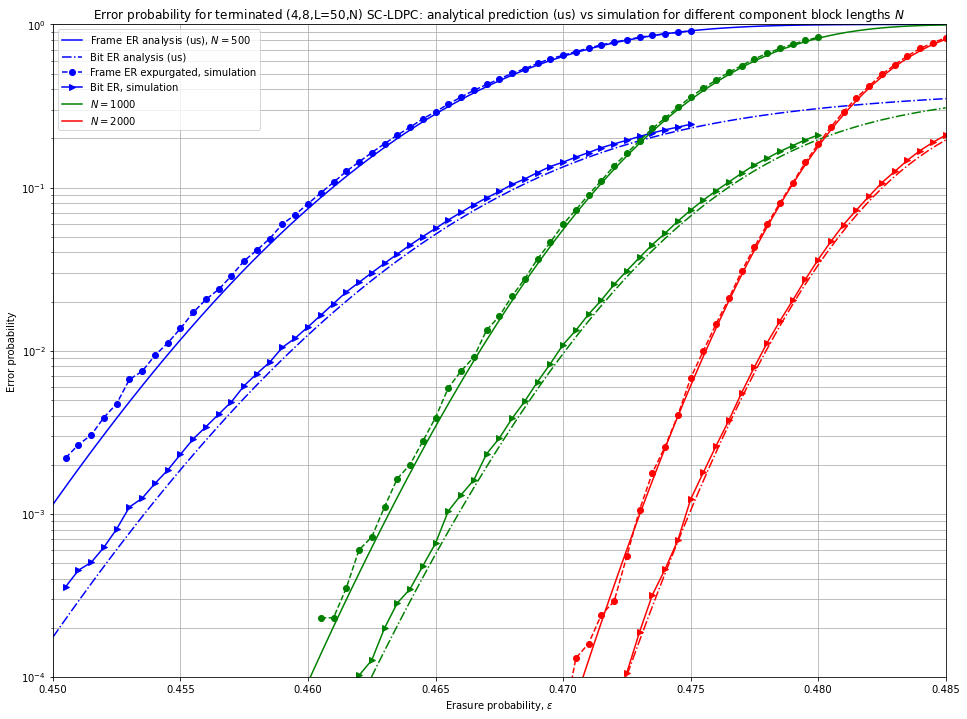

In [14]:
# Scaling law vs simulation results for full BP and unlimited iterations

from fl_scaling.scaling_laws_full_BP_unlim_iter import *

L = 50

start = 0.45
stop = 0.485
x = np.linspace(start, stop, 100)

plt.figure(figsize=(16,12))

fer500_law = np.array([ fer_term_4_8(eps, 500, L) for eps in x])
ber500_law = np.array([ ber_term_4_8(eps, 500, L) for eps in x])

plt.semilogy(x, fer500_law, 'b-', label='Frame ER analysis (us), $N = 500$')
plt.semilogy(x, ber500_law, 'b-.', label='Bit ER analysis (us)')

es_500_upd, _, _, _, _, fer_500_exp_upd, ber_500_exp_upd = np.loadtxt('sim_data/error_rates/terminated_fer_plr_sc_ldpc_4_8_50_500.dat', unpack=True)
plt.semilogy(es_500_upd, fer_500_exp_upd, 'b--o', label='Frame ER expurgated, simulation')
plt.semilogy(es_500_upd, ber_500_exp_upd, 'b->', label='Bit ER, simulation')

fer1000_law = np.array([ fer_term_4_8(eps, 1000, L) for eps in x])
ber1000_law = np.array([ ber_term_4_8(eps, 1000, L) for eps in x])

plt.semilogy(x, fer1000_law, 'g-', label='$N = 1000$')
plt.semilogy(x, ber1000_law, 'g-.')

es_1000_upd, _, _, _, _, fer_1000_exp_upd, ber_1000_exp_upd = np.loadtxt('sim_data/error_rates/terminated_fer_plr_sc_ldpc_4_8_50_1000.dat', unpack=True)
plt.semilogy(es_1000_upd, fer_1000_exp_upd, 'g--o')
plt.semilogy(es_1000_upd, ber_1000_exp_upd, 'g->')

# # Use the code commented below to plot the results from the simulated ER files generated as described above
# vals_1000 = np.loadtxt('sim_data/error_rates/terminated_fer_plr_bler_sc_ldpc_4_8_50_1000.dat', unpack=True)
# es_1000 = vals_1000[0]
# fer_1000 = vals_1000[7]
# ber_1000 = vals_1000[8]
# bler_1000 = vals_1000[9]
# plt.semilogy(es_1000, fer_1000, 'g--o')
# plt.semilogy(es_1000, ber_1000, 'g->')
# #plt.semilogy(es_1000, bler_1000, 'g-.s')

fer2000_law = np.array([ fer_term_4_8(eps, 2000, L) for eps in x])
ber2000_law = np.array([ ber_term_4_8(eps, 2000, L) for eps in x])

plt.semilogy(x, fer2000_law, 'r-', label='$N = 2000$')
plt.semilogy(x, ber2000_law, 'r-.')

es_2000_upd, _, _, _, _, fer_2000_exp_upd, ber_2000_exp_upd = np.loadtxt('sim_data/error_rates/terminated_fer_plr_sc_ldpc_4_8_50_2000.dat', unpack=True)
plt.semilogy(es_2000_upd, fer_2000_exp_upd, 'r--o')
plt.semilogy(es_2000_upd, ber_2000_exp_upd, 'r->')

plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("Error probability for terminated (4,8,L=50,N) SC-LDPC: analytical prediction (us) vs simulation for different component block lengths $N$")
plt.ylim(bottom=1e-4,top=1e0)
plt.xlim(left=start,right=stop)
plt.grid(which='both')
plt.legend()
plt.show()

# Estimating $\breve{\nu}$ and $\breve{\theta}$

## Estimating $\breve{\nu}$

Estimating the variance constant $\breve{\nu}$ is done from a set of Monte-Carlo simulations of peeling decoding for a specific $(\epsilon, N)$. We use $(\epsilon=0.48, N=10^4)$ here.

In [15]:
# # First, the PD variance simulator needs the expected number of deg-1 CNs from mean evolution
# # saved in a separate file. The file is already generated. To re-generate it, uncomment (Select + Command + Forward-Slash) and execute
# # this cell.

# from fl_scaling.mean_evolution import steps_sc_ldpc

# deg1s, r_dist, r_total, v_total, variances = steps_sc_ldpc(e=0.48, s=4, m=10_000, w=50, frame_len=4, is_terminated=False)

# with open('data/r1_sc_ldpc_4_8_50_10000_048_nonterminated_theory_full.pkl', 'wb') as f:
#     pickle.dump([deg1s, r_dist, r_total, v_total, variances], f)


Second, the ME file must be passed to the variance simulator of peeling decoding along with other parameters.
The simulator is run from the command line. In the setup below, it generates 500 PD trajectories in chunks of 100
and produces the sum of squares of the distance to the mean along with the number of trajectories that generated it.
From that, the variance can be calculated by dividing one by another.
This is done on a per-iteration basis; after that, the overall variance is estimated by averaging the variances obtained for the steady state, and the variance constant is estimated by multiplying the resulting average variance by N (see Olmos and Urbanke, 2015).

The calculation of the sum and the number of trajectories contributing to the sum is done because we have simulated 200 such chunks (totalling 500 * 200 = 10_000 trajectories) on the cluster and generated separate files.
The splitting allows to merge the results; the trick is that some trajectories may fail and are therefore excluded.

To generate one such chunk, `var_4_8_50_10000_048_nonterm_0.pkl`, run the code below from `simulators_sc_ldpc/peeling_decoding`.



If anaconda is used, the environment with all the packages needs to be activated before the code can be run from the command line:
```bash
$ conda activate
(base) $ which python3
/Users/USERNAME/opt/anaconda3/bin/python3
```

After that, the code below can be run. *NB: this simulation takes ~8 hours on a MacBook Pro M2 2022.*
```bash
$ cd simulators_sc_ldpc/peeling_decoding
$ python3 simulate_variance.py ../../sim_data/variance_peeling_decoding/var_4_8_50_10000_048_nonterm_0.pkl 4 8 50 10000 0.48 N U 500 100 ../../data/r1_sc_ldpc_4_8_50_10000_048_nonterminated_theory_full.pkl
```


After the file(s) `var_4_8_50_10000_048_nonterm_0.pkl` are generated, they can be aggregated into a single file, from which the parameter $\breve{\nu}$ will be estimated. The aggregated file from our cluster simulations is already provided in `sim_data/variance_peeling_decoding/aggregated_var_4_8_50_10000_048_cluster.pkl`. To generate such a file manually from simulations launched as described above, uncomment and execute the cell below.

In [16]:
# ssquares, counts = None, None
# isfirst = True

# num_chunks = 1
# for i in range(num_chunks):
#     with open(f"sim_data/variance_peeling_decoding/var_4_8_50_10000_048_nonterm_{i}.pkl", 'rb') as f:
#         ssquares_chunk, counts_chunk = pickle.load(f)
#     ssquares = ssquares_chunk if isfirst else ssquares + ssquares_chunk
#     counts = counts_chunk if isfirst else counts + counts_chunk
#     isfirst = False
    
# with open(f"sim_data/variance_peeling_decoding/aggregated_var_4_8_50_10000_048.pkl", "wb") as f:
#     pickle.dump((ssquares, counts), f)

Finally, the variance is estimated from the aggregated file (again, our cluster-generated file is used)

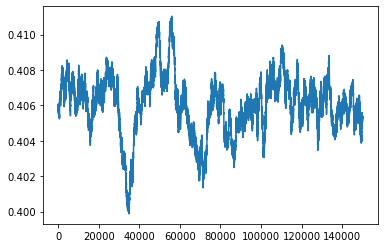

nu = 0.40602377870922296
[100000 100000 100000 ...  99999  99999  99999]


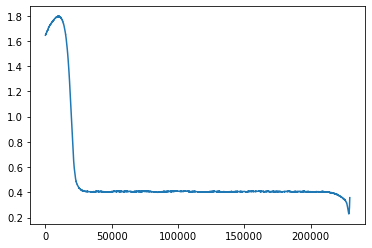

In [17]:
N = 10_000

# from est_scaling_params import *
#lvl, idxs = find_level(r1s_theory)

idxs = np.arange(50000, 200000) # the range chosen manually, see the last generated plot below

## The file name without '_cluster' is generated by the cell above. Uncomment the line below to use it.
#with open(f"sim_data/variance_peeling_decoding/aggregated_var_4_8_50_10000_048.pkl", "rb") as f:
with open(f"sim_data/variance_peeling_decoding/aggregated_var_4_8_50_10000_048_cluster.pkl", "rb") as f:
    ssquares, counts = pickle.load(f)

var = ssquares / counts
varN = var * N
varN_steady = varN[:-1][idxs]
plt.plot(varN_steady)
plt.show()
anu = np.mean(varN_steady)
print(f"nu = {anu}")
print(counts[:-1][idxs])
plt.plot(varN)
plt.show()

## Estimating $\breve{\theta}$

To estimate the covariance decay constant, we need a set of realizations of the peeling decoding process. The realizations are already generated. To re-generate them, run `peeling_decoding.py` as shown below.

If anaconda is used, the environment with all the packages needs to be activated before the code can be run from the command line:
```bash
$ conda activate
(base) $ which python3
/Users/USERNAME/opt/anaconda3/bin/python3
```

After that, the code below can be run. A hundred trajectories are generated in about two hours on a Macbook Pro 2022 M2.
```bash
$ cd simulators_sc_ldpc/peeling_decoding
$ python3 peeling_decoding.py
```

The parameters are hard-coded to those used below; changing them should be done in `peeling_decoding.py` in `test_sc_ldpc()`.

In [18]:
with open('sim_data/trajectories_peeling_decoding/r1_sc_ldpc_4_8_50_10000_048_nonterminated_0.pkl', 'rb') as f:
    r1_sc_ldpc_4_8_50_10000_048_nonterminated, plrs_sc_ldpc_4_8_50_10000_048_nonterminated = pickle.load(f)

# This file has been generated as described above, in the first (commented out) cell about 'generating \breve{\nu}'
with open('data/r1_sc_ldpc_4_8_50_10000_048_nonterminated_theory_full.pkl', 'rb') as f:
    r1_sc_ldpc_4_8_50_10000_048_nonterminated_theory = pickle.load(f)[0]

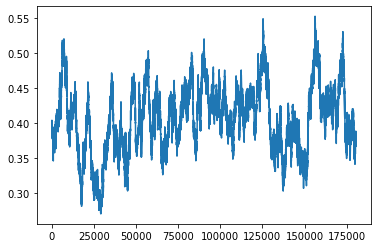

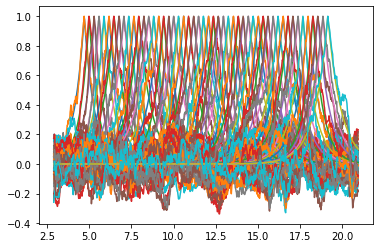

taustar = lambda g: 0.05792 * L
end_coeff = lambda g: g * L
gamma   = 2.071663030125614
nu      = 0.40527227721877696
theta   = 1.4635370071083604
1.4635370071083604


In [19]:
from fl_scaling.est_scaling_params import *

r1s = r1_sc_ldpc_4_8_50_10000_048_nonterminated
r1s_theory = r1_sc_ldpc_4_8_50_10000_048_nonterminated_theory

theta_est = est_scaling_params_with_theta(r1s, r1s_theory, 0.48, gstar, 10000, 50)[-1]
print(theta_est)

In [20]:
# freeing up memory
r1_sc_ldpc_4_8_50_10000_048_nonterminated = None
r1s = None

These values for $\breve{\nu}$ and $\breve{\theta}$ are used above in the finite-length scaling laws to obtain the prediction curves for FER and BER and compare with simulations.

Note: the value `theta = 1.466967421177831` $\approx 1.47$ was used for $\breve{\theta}$ instead of `1.4635370071083604` in the papers. It was generated from a different set of trajectories and on a different platform. The difference in predictions is insignificant.

# Full BP Limited Iterations: Constant Speed Model

## Estimating $I_\mathsf{start}, I_\mathsf{end}, \breve{\gamma}_\mathsf{BP}$ from Mean Evolution for Parallel Peeling Decoding (PPD) and $V_\mathsf{BP}$ from Density Evolution

Density Evolution can be used instead of Mean Evolution for Parallel Peeling Decoding with the same results.

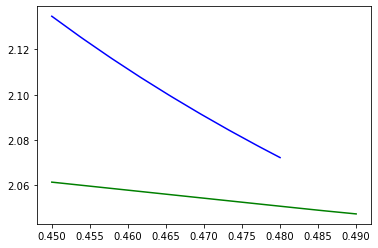

In [21]:
# Estimating gamma_BP

N = 1000
L = 50

start = 0.45
stop = 0.49

# # The code that generated the file. Uncomment and run the cell to re-generate.
# from fl_scaling.mean_evolution import steps_sc_ldpc_parallel_pd
# from fl_scaling.est_scaling_params import *

# gs = np.linspace(start, stop, 10)
# gammas = []
# for g in gs:
#     #r1s = steps_sc_ldpc_parallel_pd(e=g, N=N, L=L, ld=5, is_terminated=False)[0]
#     _, _, _, v_total = steps_sc_ldpc_parallel_pd(e=g, N=N, L=L, ld=4, is_terminated=False)
#     v_tot = np.sum(v_total, axis=1)
#     v_tot_diff = np.diff(v_tot) * -1
    
#     #ssstart, ssstop = find_level_robust_ppd(r1s, N, gstar, g, 1e-2)
#     lvl, _ = find_level(v_tot_diff)
#     ag = calc_gamma(lvl, N, gstar, g)
#     gammas.append(ag)
#     print(ag)

# with open('data/gammas_ldpc_4_8_nonterminated_ppd_vn.dat', 'wb') as f:
#     pickle.dump((gs, gammas), f)

with open('data/gammas_ldpc_4_8_nonterminated_ppd_vn.dat', 'rb') as f:
    gs, gammas = pickle.load(f)

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
gammaf_ppd_vn = interp1d(gs, gammas)

plt.plot(x, gammaf_ppd_vn(x), color='green') # this one is from PPD ME (or DE)
x = np.linspace(0.45, 0.48)
plt.plot(x, gammaf(x), color="blue") # this one is from Mean Evolution

plt.show()

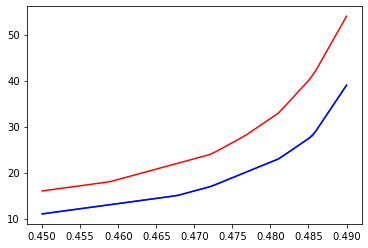

In [22]:
# Estimating I_start (taustar_interp_ldpc_term_ppd_vn) and I_end (collapse_interp_ldpc_term_ppd_vn)


N = 1000
L = 50

start = 0.45
stop = 0.49

gs = np.linspace(start, stop, 10)

# # This is the code that generated the file. Uncomment and run the cell to re-generate.
# from fl_scaling.mean_evolution import steps_sc_ldpc_parallel_pd
# from fl_scaling.est_scaling_params import *

# tstars = []
# endstars = []
# collapse_times = []
# for g in gs:
#     _, _, _, v_total = steps_sc_ldpc_parallel_pd(e=g, N=N, L=L, ld=4, is_terminated=True)
#     v_tot = np.sum(v_total, axis=1)
#     v_tot_diff = np.diff(v_tot) * -1
#     ssstart, ssstop = find_level_robust_ppd(v_tot_diff, N, gstar, g, 1e-2)
#     v_tot_diff_end = np.min(np.where(v_tot_diff < 1))
#     tstars.append(ssstart)
#     endstars.append(ssstop)
#     collapse_times.append(v_tot_diff_end - ssstop)
#     print(g, ssstart, ssstop, v_tot_diff_end - ssstop)
# with open('data/taustar_endstar_collapse_ldpc_4_8_terminated_ppd_vn.dat', 'wb') as f:
#     pickle.dump((gs, tstars, endstars, collapse_times), f)

with open('data/taustar_endstar_collapse_ldpc_4_8_terminated_ppd_vn.dat', 'rb') as f:
    gs, tstars, endstars, collapse_times = pickle.load(f)

from scipy.interpolate import interp1d
x = np.linspace(start, stop)
taustar_interp_ldpc_term_ppd_vn = interp1d(gs, tstars)
endstar_interp_ldpc_term_ppd_vn = interp1d(gs, endstars)
collapse_interp_ldpc_term_ppd_vn = interp1d(gs, collapse_times)

plt.plot(gs, tstars)

plt.plot(x, taustar_interp_ldpc_term_ppd_vn(x), color='blue')
plt.plot(x, collapse_interp_ldpc_term_ppd_vn(x), color='red')

# plt.plot(x, endstar_interp_ldpc_term_ppd_vn(x), color='red')

plt.show()

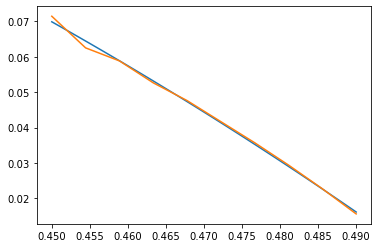

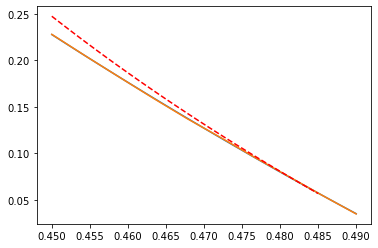

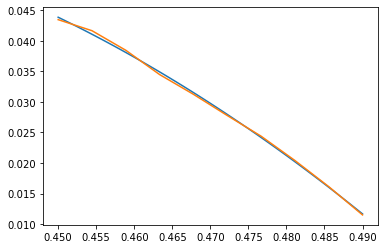

In [23]:
# Estimating the speed of the wave V_BP (wave_speed_f) from density evolution.

ld = 4
rd = 8
L = 50
es = np.linspace(0.45, 0.49, 10)

# # The code that generated the file. Uncomment and run the cell to re-generate.
# from fl_scaling.density_evolution import de_sc_ldpc
# init_periods = np.zeros(es.shape)
# speeds = np.zeros(es.shape)
# collapse_times = np.zeros(es.shape)
# wave_widths = np.zeros(es.shape)

# i = 0
# for e in es:
#     plr, init_period, wave_speed, collapse_time, wave_width, plrs_all, delta_plrs = de_sc_ldpc(e, ld, rd, L)
#     print(e, plr, init_period, 1 / wave_speed, wave_speed, collapse_time, wave_width)
#     init_periods[i] = init_period
#     speeds[i] = wave_speed
#     collapse_times[i] = collapse_time
#     wave_widths[i] = wave_width
#     i += 1
# np.savetxt(f"data/wave_params_bec_bp_{ld}_{rd}_semi.txt", np.c_[es, init_periods, speeds, collapse_times, wave_widths], comments='', header='E INIT_PERIOD SPEED COLLAPSE_TIME WAVE_WIDTH')

es, init_periods, speeds, collapse_times, wave_widths = np.loadtxt(f"data/wave_params_bec_bp_{ld}_{rd}_semi.txt", skiprows=1, unpack=True)

x = np.linspace(min(es), max(es))

def parabolic_func(x, a, b, c):
    return a * x**2 + b * x + c

fit_params_speed = curve_fit(parabolic_func, es, speeds)
wave_speed_f = lambda x: parabolic_func(x, *fit_params_speed[0])

fit_params_init = curve_fit(parabolic_func, es, 1 / init_periods)
init_period_f = lambda x: 1 / parabolic_func(x, *fit_params_init[0])

fit_params_collapse = curve_fit(parabolic_func, es, 1 / collapse_times)
collapse_time_f = lambda x: 1 / parabolic_func(x, *fit_params_collapse[0])

x_old = np.linspace(0.45, 0.485, 100)
ss_lvls = gammaf(x_old) * (gstar - x_old)
speeds_from_pd = vss_interp_ldpc_term(x_old) * ss_lvls

speeds_from_ss = L / (endstar(x_old) - taustar(x_old)) * ss_lvls

plt.plot(x, 1 / init_period_f(x))
plt.plot(es, 1 / init_periods)
plt.show()

plt.plot(x, wave_speed_f(x))
plt.plot(es, speeds)
plt.plot(x_old, speeds_from_pd, '--', color='red')
#plt.plot(x_old, speeds_from_ss, '--', color='black')
plt.show()

plt.plot(x, 1 / collapse_time_f(x))
plt.plot(es, 1 / collapse_times)
plt.show()

## Simulating Full BP decoding with limited iterations

The simulated error rate files used below have already been generated. To obtain them, compile and run `bp_lim_iter` with appropriate arguments as described below.


After that, the code below can be run. It is written in such a way that many instances can be run (e.g., on a cluster), each generating its own output file, and these files can be combined with an `awk` script below.

The script below simulates 1000 transmissions for each $\epsilon$ only.

First, the code needs to be compiled (it's written in C):

```bash
$ cd simulators_sc_ldpc/bp_decoding
$ CC=gcc cmake -DCMAKE_BUILD_TYPE=Release . && make
```

Then, the simulator for full BP decoding with a limit on the number of iterations can be run:
```bash
$ ./bp_lim_iter 0 0 0 175
```
In this example, the first `0` is the index of the output file and `175` is the limit on the number of iterations. Other parameters are hard-coded: the ensemble is $(4,8,L=50,N=1000)$. The range of $\epsilon$ starts from $0.48$ down to $0.45$ as below. For each $\epsilon$, $1000$ transmissions are simulated (all this can be changed in the source code; the binary must be recompiled in that case). The output format is cluster-friendly: several instances with different indices can be run (e.g., on a SLURM cluster with the environmental variable `${SLURM_ARRAY_TASK_ID}`), and their results aggregated using the `awk` script provided below.

Once the individual files are generated (a single file generated above will do), their results can be combined using the script below (assuming the directory is `simulators_sc_ldpc/bp_decoding` as above):
```bash
$ awk 'BEGIN{print "p BER FER BLER BER_EXP FER_EXP BLER_EXP n L f users_err frame_err block_err users_err_exp frame_err_exp block_err_exp"}; FNR==1{next} {ns[$1]=$8; ls[$1]=$9; fs[$1]+=$10; users_err[$1]+=$11; frames_err[$1]+=$12; blocks_err[$1]+=$13; users_err_exp[$1]+=$14; frames_err_exp[$1]+=$15; blocks_err_exp[$1]+=$16} END{for (e in users_err) print e, users_err[e]/ns[e]/fs[e], frames_err[e]/fs[e], blocks_err[e]/ls[e]/fs[e], users_err_exp[e]/ns[e]/fs[e], frames_err_exp[e]/fs[e], blocks_err_exp[e]/ls[e]/fs[e], ns[e], ls[e], fs[e], users_err[e], frames_err[e], blocks_err[e], users_err_exp[e], frames_err_exp[e], blocks_err_exp[e]}' SC_LDPC_4_8_L50_M500_BP_SW0_175it_Random_BLER_*.dat | sort -n -k1 > SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC_mine.dat
$ cp SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC_mine.dat ../../sim_data/error_rates
```

The data used for the plots below were generated on a cluster; the usage of the final script generated above is included below (commented out).


## Full BP decoding with limited iterations: Constant Speed model vs simulations

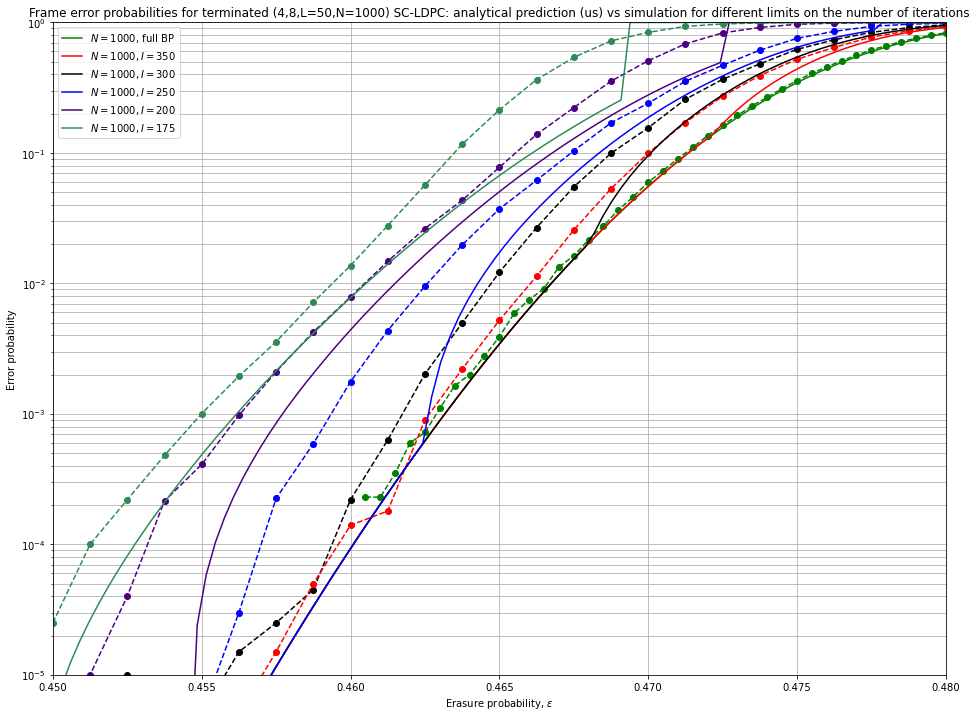

In [24]:
# 175 iterations
## Uncomment the line below (and comment out the line after that)
## to use the file generated be the scripts above instead of the cluster-generated file we provide.
#vals1000_175it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC_mine.dat", unpack=True, skiprows=2)
vals1000_175it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC.dat", unpack=True, skiprows=2)
xsim1000_175it = vals1000_175it[0]
bersim1000_175it = vals1000_175it[4]
fersim1000_175it = vals1000_175it[5]
blersim1000_175it = vals1000_175it[6]

# 200 iterations
vals1000_200it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_200it_BEC.dat", unpack=True, skiprows=2)
xsim1000_200it = vals1000_200it[0]
bersim1000_200it = vals1000_200it[4]
fersim1000_200it = vals1000_200it[5]
blersim1000_200it = vals1000_200it[6]

# 250 iterations
vals1000_250it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_250it_BEC.dat", unpack=True, skiprows=2)
xsim1000_250it = vals1000_250it[0]
bersim1000_250it = vals1000_250it[4]
fersim1000_250it = vals1000_250it[5]
blersim1000_250it = vals1000_250it[6]

# 300 iterations
vals1000_300it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_300it_BEC.dat", unpack=True, skiprows=2)
xsim1000_300it = vals1000_300it[0]
bersim1000_300it = vals1000_300it[4]
fersim1000_300it = vals1000_300it[5]
blersim1000_300it = vals1000_300it[6]

# 350 iterations
vals1000_350it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_350it_BEC.dat", unpack=True, skiprows=2)
xsim1000_350it = vals1000_350it[0]
bersim1000_350it = vals1000_350it[4]
fersim1000_350it = vals1000_350it[5]
blersim1000_350it = vals1000_350it[6]

plt.figure(figsize=(16,12))

start = 0.45
stop = 0.48

x = np.linspace(start, stop, 100)
fer1k_full = np.array([ fer_term_4_8(e, 1000, 50) for e in x])
plt.semilogy(x, fer1k_full, 'g-', label='$N = 1000$, full BP')

plt.semilogy(es_1000_upd, fer_1000_exp_upd, 'g--o')

plt.semilogy(xsim1000_175it, fersim1000_175it, '--o', color='seagreen')
plt.semilogy(xsim1000_200it, fersim1000_200it, '--o', color='indigo')
plt.semilogy(xsim1000_250it, fersim1000_250it, '--o', color='b')
plt.semilogy(xsim1000_300it, fersim1000_300it, '--o', color='k')
plt.semilogy(xsim1000_350it, fersim1000_350it, '--o', color='r')

# # Constant speed model. Uncomment this and execute the cell to generate the file below.
# start = 0.45
# stop = 0.48
# x = np.linspace(start, stop, 100)
# from fl_scaling.scaling_laws_full_BP_lim_iter import pb_term_bec_lim_iter_speed
# fer1k_350it_sp_leff = np.array([ pb_term_bec_lim_iter_speed(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 350, taustar_interp_ldpc_term_ppd_vn(g), wave_speed_f(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_300it_sp_leff = np.array([ pb_term_bec_lim_iter_speed(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 300, taustar_interp_ldpc_term_ppd_vn(g), wave_speed_f(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_250it_sp_leff = np.array([ pb_term_bec_lim_iter_speed(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 250, taustar_interp_ldpc_term_ppd_vn(g), wave_speed_f(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_200it_sp_leff = np.array([ pb_term_bec_lim_iter_speed(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 200, taustar_interp_ldpc_term_ppd_vn(g), wave_speed_f(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_175it_sp_leff = np.array([ pb_term_bec_lim_iter_speed(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 175, taustar_interp_ldpc_term_ppd_vn(g), wave_speed_f(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_constant_speed_ppd_bounds_ours_leff.dat",\
#     np.c_[x,\
#           fer1k_350it_sp_leff,\
#           fer1k_300it_sp_leff,\
#           fer1k_250it_sp_leff,\
#           fer1k_200it_sp_leff,\
#           fer1k_175it_sp_leff],\
#     header='epsilon fer_350it fer_300it fer_250it fer_200it fer_175it')
x,\
    fer1k_350it_sp_leff,\
    fer1k_300it_sp_leff,\
    fer1k_250it_sp_leff,\
    fer1k_200it_sp_leff,\
    fer1k_175it_sp_leff =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_constant_speed_ppd_bounds_ours_leff.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_350it_sp_leff, 'r-', label='$N = 1000, I=350$')
plt.semilogy(x, fer1k_300it_sp_leff, 'k-', label='$N = 1000, I=300$')
plt.semilogy(x, fer1k_250it_sp_leff, 'b-', label='$N = 1000, I=250$')
plt.semilogy(x, fer1k_200it_sp_leff, '-', color='indigo', label='$N = 1000, I=200$')
plt.semilogy(x, fer1k_175it_sp_leff, '-', color='seagreen', label='$N = 1000, I=175$')


plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("Frame error probabilities for terminated (4,8,L=50,N=1000) SC-LDPC: analytical prediction (us) vs simulation for different limits on the number of iterations")
plt.ylim(bottom=1e-5,top=1e0)
plt.xlim(left=0.45,right=0.48)
plt.grid(which='both')
plt.legend()
plt.show()

# Full BP Limited Iterations: Jumping OU model

Note: the scaling law code for the jumping OU model below takes up an insane amount of RAM. On my current Macbook Pro 2022 with the M2 chip, it kills the kernel. This wasn't the case for my previous laptop, Macbook Pro 2017 with the Intel chip (to which I no longer have access). The data provided in this repository are generated using the previous laptop. The repository will be updated once I find a way to fix the memory leak.

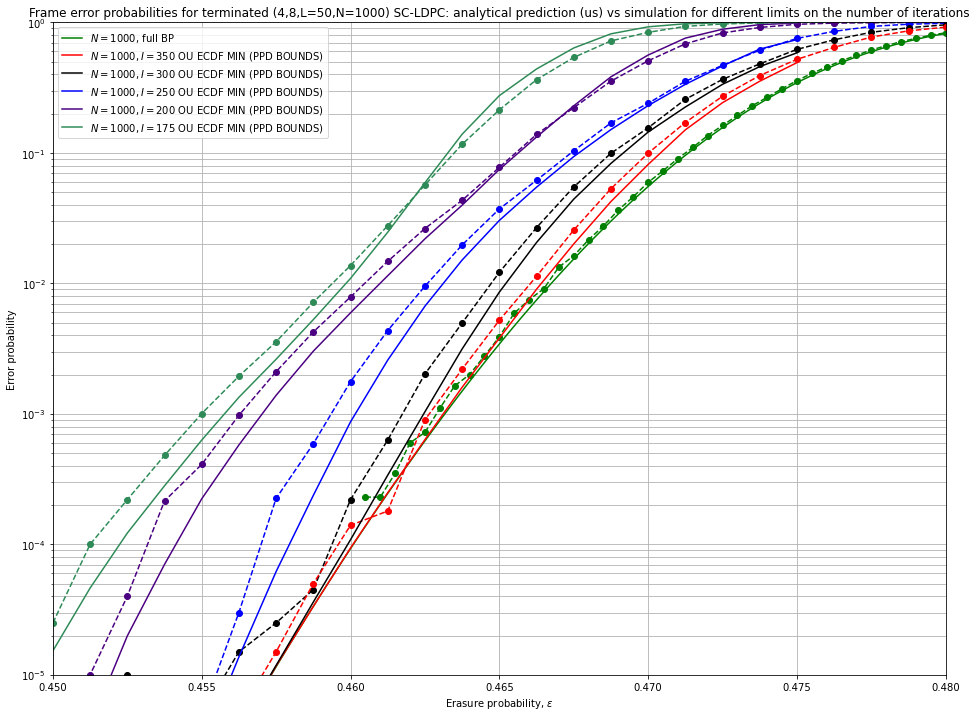

In [25]:
# 175 iterations
vals1000_175it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC.dat", unpack=True, skiprows=2)
xsim1000_175it = vals1000_175it[0]
bersim1000_175it = vals1000_175it[4]
fersim1000_175it = vals1000_175it[5]
blersim1000_175it = vals1000_175it[6]


# 200 iterations
vals1000_200it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_200it_BEC.dat", unpack=True, skiprows=2)
xsim1000_200it = vals1000_200it[0]
bersim1000_200it = vals1000_200it[4]
fersim1000_200it = vals1000_200it[5]
blersim1000_200it = vals1000_200it[6]

# 250 iterations
vals1000_250it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_250it_BEC.dat", unpack=True, skiprows=2)
xsim1000_250it = vals1000_250it[0]
bersim1000_250it = vals1000_250it[4]
fersim1000_250it = vals1000_250it[5]
blersim1000_250it = vals1000_250it[6]

# 300 iterations
vals1000_300it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_300it_BEC.dat", unpack=True, skiprows=2)
xsim1000_300it = vals1000_300it[0]
bersim1000_300it = vals1000_300it[4]
fersim1000_300it = vals1000_300it[5]
blersim1000_300it = vals1000_300it[6]

# 350 iterations
vals1000_350it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_350it_BEC.dat", unpack=True, skiprows=2)
xsim1000_350it = vals1000_350it[0]
bersim1000_350it = vals1000_350it[4]
fersim1000_350it = vals1000_350it[5]
blersim1000_350it = vals1000_350it[6]

plt.figure(figsize=(16,12))

start = 0.45
stop = 0.48

x = np.linspace(start, stop, 100)
fer1k_full = np.array([ fer_term_4_8(e, 1000, 50) for e in x])
plt.semilogy(x, fer1k_full, 'g-', label='$N = 1000$, full BP')

plt.semilogy(es_1000_upd, fer_1000_exp_upd, 'g--o')

plt.semilogy(xsim1000_175it, fersim1000_175it, '--o', color='seagreen')
plt.semilogy(xsim1000_200it, fersim1000_200it, '--o', color='indigo')
plt.semilogy(xsim1000_250it, fersim1000_250it, '--o', color='b')
plt.semilogy(xsim1000_300it, fersim1000_300it, '--o', color='k')
plt.semilogy(xsim1000_350it, fersim1000_350it, '--o', color='r')

# # Jumping OU model. Uncomment this and execute the cell to generate the file below. (NB! There's a memory leak, see above)
# start = 0.45
# stop = 0.475
# x = np.linspace(start, stop, 5 * 4 + 1)

# import warnings
# warnings.filterwarnings("ignore")

# from fl_scaling.scaling_laws_full_BP_lim_iter import pb_term_bec_lim_iter_min_ecdf_sim
# fer1k_350it_ecdf_min_ppd_bounds = np.array([ pb_term_bec_lim_iter_min_ecdf_sim(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 350, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_300it_ecdf_min_ppd_bounds = np.array([ pb_term_bec_lim_iter_min_ecdf_sim(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 300, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_250it_ecdf_min_ppd_bounds = np.array([ pb_term_bec_lim_iter_min_ecdf_sim(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 250, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_200it_ecdf_min_ppd_bounds = np.array([ pb_term_bec_lim_iter_min_ecdf_sim(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 200, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# fer1k_175it_ecdf_min_ppd_bounds = np.array([ pb_term_bec_lim_iter_min_ecdf_sim(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 175, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g)) for g in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_ou_ecdf_min_ppd_bounds_ours.dat",\
#     np.c_[x,\
#           fer1k_350it_ecdf_min_ppd_bounds,\
#           fer1k_300it_ecdf_min_ppd_bounds,\
#           fer1k_250it_ecdf_min_ppd_bounds,\
#           fer1k_200it_ecdf_min_ppd_bounds,\
#           fer1k_175it_ecdf_min_ppd_bounds],\
#     header='epsilon fer_350it fer_300it fer_250it fer_200it fer_175it')
x,\
    fer1k_350it_ecdf_min_ppd_bounds,\
    fer1k_300it_ecdf_min_ppd_bounds,\
    fer1k_250it_ecdf_min_ppd_bounds,\
    fer1k_200it_ecdf_min_ppd_bounds,\
    fer1k_175it_ecdf_min_ppd_bounds =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_ou_ecdf_min_ppd_bounds_ours.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_350it_ecdf_min_ppd_bounds, 'r-', label='$N = 1000, I=350$ OU ECDF MIN (PPD BOUNDS)')
plt.semilogy(x, fer1k_300it_ecdf_min_ppd_bounds, 'k-', label='$N = 1000, I=300$ OU ECDF MIN (PPD BOUNDS)')
plt.semilogy(x, fer1k_250it_ecdf_min_ppd_bounds, 'b-', label='$N = 1000, I=250$ OU ECDF MIN (PPD BOUNDS)')
plt.semilogy(x, fer1k_200it_ecdf_min_ppd_bounds, '-', color='indigo', label='$N = 1000, I=200$ OU ECDF MIN (PPD BOUNDS)')
plt.semilogy(x, fer1k_175it_ecdf_min_ppd_bounds, '-', color='seagreen', label='$N = 1000, I=175$ OU ECDF MIN (PPD BOUNDS)')

plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("Frame error probabilities for terminated (4,8,L=50,N=1000) SC-LDPC: analytical prediction (us) vs simulation for different limits on the number of iterations")
plt.ylim(bottom=1e-5,top=1e0)
plt.xlim(left=0.45,right=0.48)
plt.grid(which='both')
plt.legend()
plt.show()

# Full BP Limited Iterations: Gaussian PPD Model

Gaussian PPD model requires the scaling parameters $\breve{\nu}_\mathsf{BP}$ and $\breve{\theta}_\mathsf{BP}$. These parameters are estimated from a set of realizations of BP decoding. Specifically, we need to know how many bits are recovered in each iteration for a set of trajectories. The corresponding trajectories are already provided. If re-estimating these parameters is not needed, simply skip the cells below until the cell where `nu_ppd_vn` and `theta_ppd_vn` are hard-coded.

To generate them manually, use the binary file `bp_traj` provided alongside `bp_lim_iter` in `simulators_sc_ldpc/bp_decoding`. The compilation instructions are the same as for `bp_lim_iter` given above (all executables are generated at once, so there is no need in re-doing the compilation steps if no changes were introduced).

Example usage (assuming the working directory is `simulators_sc_ldpc/bp_decoding`):
```bash
$ ./bp_traj 0 0 0 500 0
$ cp trajectories_0.4600_truncated_SC_LDPC_4_8_L50_M2500_BP_Full_500it_Random_BLER_*.dat ../../sim_data/trajectories_bp_decoding/
```

The first `0` is the file suffix, `500` is the limit on the number of iterations, and the final `0` says that the ensemble is truncated (only one wave is present). The ensemble and channel parameters must be configured manually in the source code. The file generated by default is `trajectories_0.4600_truncated_SC_LDPC_4_8_L50_M2500_BP_Full_500it_Random_BLER_0.dat`.

In [26]:
from io import StringIO

e = 0.46
N = 5000
pad_size = 500

tr_array_list_unt = []
tr_vns_list_unt = []

for i in range(200):
    with open(f'sim_data/trajectories_bp_decoding/trajectories_{e:.4f}_truncated_SC_LDPC_4_8_L50_M{int(N/2)}_BP_Full_{pad_size}it_Random_BLER_{i}.dat', 'rt') as f_data:    
        for tr in f_data.read().split('\n\n'):
            if tr == "": continue
            tr_str = StringIO(tr)
            tr_iter, tr_arr, tr_vns = np.loadtxt(tr_str, unpack=True)
            tr_arr = np.pad(tr_arr, (0, pad_size - len(tr_arr)), mode="constant")
            tr_vns = np.pad(tr_vns, (0, pad_size - len(tr_vns)), mode="constant")
            tr_array_list_unt.append(tr_arr)
            tr_vns_list_unt.append(tr_vns)

tr_array_unt = np.vstack([tr for tr in tr_array_list_unt])
tr_vns_unt = np.vstack([tr for tr in tr_vns_list_unt])

/var/folders/2_/ggtxz_kn6gn7z_rcqflg7px00000gn/T/ipykernel_20160/3374568645.py:6: RuntimeWarning: invalid value encountered in divide
  tr_vns_mean = np.sum(tr_vns_unt[:,0:pad_size], axis=0) / np.sum(tr_vns_unt[:,0:pad_size] != 0, axis=0)


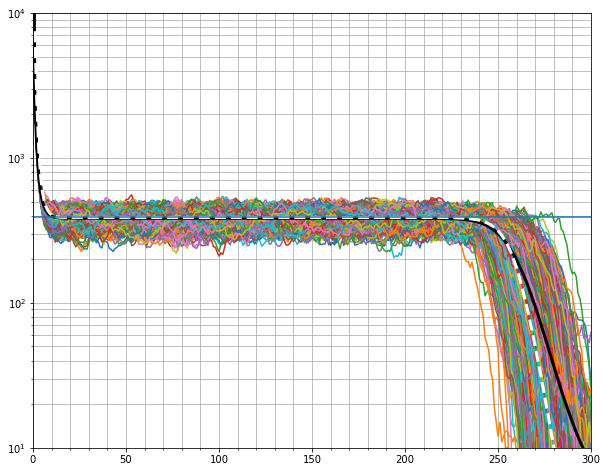

TR       383.3930309375
PPD VNs  388.29973308579997
DIF VNs  4.906702148299985


In [27]:
plt.figure(figsize=(10,8))

for tr_arr in tr_vns_unt[::200]:
    plt.semilogy(tr_arr)
    
tr_vns_mean = np.sum(tr_vns_unt[:,0:pad_size], axis=0) / np.sum(tr_vns_unt[:,0:pad_size] != 0, axis=0)
plt.semilogy(tr_vns_mean, linewidth=3, color='black')

from fl_scaling.mean_evolution import steps_sc_ldpc_parallel_pd
L = 50
r1, _, _, v_total = steps_sc_ldpc_parallel_pd(e=e, N=N, L=L, ld=4, is_terminated=False)
v_tot = np.sum(v_total, axis=1)
v_tot_diff = np.diff(v_tot) * -1

plt.semilogy(np.arange(len(v_tot_diff)) + 1, v_tot_diff, linewidth=3, color='white', linestyle='--')

plt.axhline(y = N * gammaf_ppd_vn(e) * (gstar - e))

plt.ylim(top=1e4 / 5000 * N, bottom=1e1)
plt.xlim(left=0, right=300)
plt.minorticks_on()
plt.grid(which='both')

plt.show()

mean_vn_tr_ss = np.mean(tr_vns_mean[40:200])
mean_vn_ppd_ss = np.mean(v_tot_diff[40:200])

print("TR      ", mean_vn_tr_ss)
print("PPD VNs ", mean_vn_ppd_ss)
print("DIF VNs ", mean_vn_ppd_ss - mean_vn_tr_ss)

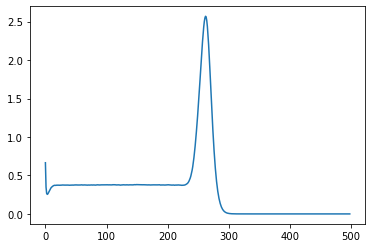

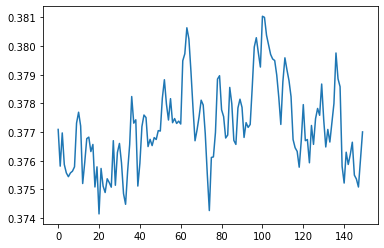

0.3772063963010756


In [28]:
var_vns = np.mean((tr_vns_unt / N - v_tot_diff[0:500] / N)**2, axis=0) * N
plt.plot(var_vns[1:])
plt.show()

plt.plot(var_vns[50:200])
plt.show()

nu_ppd_vn = np.mean(var_vns[50:200])
print(nu_ppd_vn)

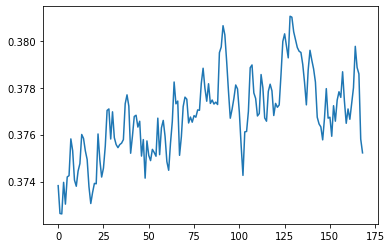

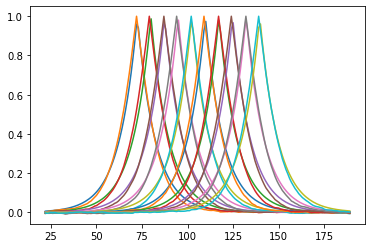

taustar = lambda g: 8.800000000000001e-05 * L
end_coeff = lambda g: g * L
gamma   = 2.0577666044192227
nu      = 0.3768183185749077
theta   = 0.10069559700311895
2.66813982520188


In [29]:
from fl_scaling.est_scaling_params import est_scaling_params_with_theta_ppd
_, _, _, _, theta_unnorm = est_scaling_params_with_theta_ppd(tr_vns_unt, v_tot_diff[0:500], e, gstar, N, 50)
theta_ppd_vn = theta_unnorm / (gstar - e)
print(theta_ppd_vn)

In [30]:
nu_ppd_vn = 0.3772063963010756
theta_ppd_vn = 2.66813982520188

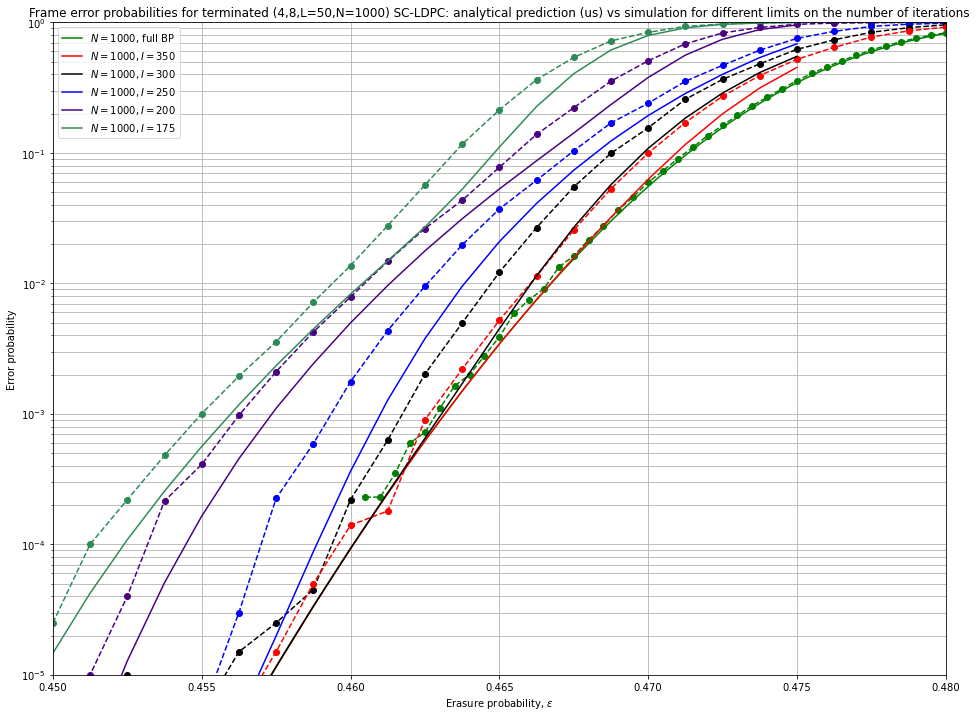

In [31]:
# 175 iterations
vals1000_175it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC.dat", unpack=True, skiprows=2)
xsim1000_175it = vals1000_175it[0]
bersim1000_175it = vals1000_175it[4]
fersim1000_175it = vals1000_175it[5]
blersim1000_175it = vals1000_175it[6]


# 200 iterations
vals1000_200it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_200it_BEC.dat", unpack=True, skiprows=2)
xsim1000_200it = vals1000_200it[0]
bersim1000_200it = vals1000_200it[4]
fersim1000_200it = vals1000_200it[5]
blersim1000_200it = vals1000_200it[6]

# 250 iterations
vals1000_250it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_250it_BEC.dat", unpack=True, skiprows=2)
xsim1000_250it = vals1000_250it[0]
bersim1000_250it = vals1000_250it[4]
fersim1000_250it = vals1000_250it[5]
blersim1000_250it = vals1000_250it[6]

# 300 iterations
vals1000_300it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_300it_BEC.dat", unpack=True, skiprows=2)
xsim1000_300it = vals1000_300it[0]
bersim1000_300it = vals1000_300it[4]
fersim1000_300it = vals1000_300it[5]
blersim1000_300it = vals1000_300it[6]

# 350 iterations
vals1000_350it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_350it_BEC.dat", unpack=True, skiprows=2)
xsim1000_350it = vals1000_350it[0]
bersim1000_350it = vals1000_350it[4]
fersim1000_350it = vals1000_350it[5]
blersim1000_350it = vals1000_350it[6]

plt.figure(figsize=(16,12))

start = 0.45
stop = 0.48

x = np.linspace(start, stop, 100)
fer1k_full = np.array([ fer_term_4_8(e, 1000, 50) for e in x])
plt.semilogy(x, fer1k_full, 'g-', label='$N = 1000$, full BP')

plt.semilogy(es_1000_upd, fer_1000_exp_upd, 'g--o')

plt.semilogy(xsim1000_175it, fersim1000_175it, '--o', color='seagreen')
plt.semilogy(xsim1000_200it, fersim1000_200it, '--o', color='indigo')
plt.semilogy(xsim1000_250it, fersim1000_250it, '--o', color='b')
plt.semilogy(xsim1000_300it, fersim1000_300it, '--o', color='k')
plt.semilogy(xsim1000_350it, fersim1000_350it, '--o', color='r')

# # Gaussian PPD model. Uncomment this and execute the cell to generate the file below.
# start = 0.45
# stop = 0.475
# x = np.linspace(start, stop, 5 * 4 + 1)
# import warnings
# warnings.filterwarnings("ignore")
# from fl_scaling.scaling_laws_full_BP_lim_iter import pb_term_bec_lim_iter_min_ppd_vn
# fer1k_350it_min_ppd_vn = np.array([ pb_term_bec_lim_iter_min_ppd_vn(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 350, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, None) for g in x])
# fer1k_300it_min_ppd_vn = np.array([ pb_term_bec_lim_iter_min_ppd_vn(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 300, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, None) for g in x])
# fer1k_250it_min_ppd_vn = np.array([ pb_term_bec_lim_iter_min_ppd_vn(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 250, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, None) for g in x])
# fer1k_200it_min_ppd_vn = np.array([ pb_term_bec_lim_iter_min_ppd_vn(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 200, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, None) for g in x])
# fer1k_175it_min_ppd_vn = np.array([ pb_term_bec_lim_iter_min_ppd_vn(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 175, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, None) for g in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_min_gaussian_ppd_vn_ours.dat",\
#     np.c_[x,\
#           fer1k_350it_min_ppd_vn,\
#           fer1k_300it_min_ppd_vn,\
#           fer1k_250it_min_ppd_vn,\
#           fer1k_200it_min_ppd_vn,\
#           fer1k_175it_min_ppd_vn],\
#     header='epsilon fer_350it fer_300it fer_250it fer_200it fer_175it')
x,\
    fer1k_350it_min_ppd_vn,\
    fer1k_300it_min_ppd_vn,\
    fer1k_250it_min_ppd_vn,\
    fer1k_200it_min_ppd_vn,\
    fer1k_175it_min_ppd_vn =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_min_gaussian_ppd_vn_ours.dat", unpack=True, skiprows=1)

plt.semilogy(x, fer1k_350it_min_ppd_vn, 'r-', label='$N = 1000, I=350$')
plt.semilogy(x, fer1k_300it_min_ppd_vn, 'k-', label='$N = 1000, I=300$')
plt.semilogy(x, fer1k_250it_min_ppd_vn, 'b-', label='$N = 1000, I=250$')
plt.semilogy(x, fer1k_200it_min_ppd_vn, '-', color='indigo', label='$N = 1000, I=200$')
plt.semilogy(x, fer1k_175it_min_ppd_vn, '-', color='seagreen', label='$N = 1000, I=175$')

plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("Frame error probabilities for terminated (4,8,L=50,N=1000) SC-LDPC: analytical prediction (us) vs simulation for different limits on the number of iterations")
plt.ylim(bottom=1e-5,top=1e0)
plt.xlim(left=0.45,right=0.48)
plt.grid(which='both')
plt.legend()
plt.show()

# Full BP Limited Iterations: Gaussian model with a shift from the jumping OU model

First, $c_\mathsf{f}$ must be estimated. This is done from simulations of the Ornstein-Uhlenbeck process. The file is already provided, but it can be generated by uncommenting the code below.

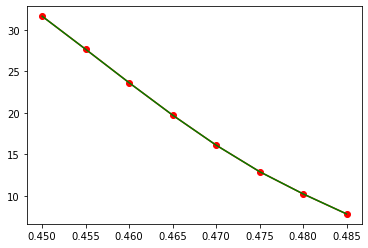

In [32]:
anI = 350
es = [0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485]
anN = 1000

# # Estimating c_f from the location of the jumping OU model. To generate the file, uncomment and run the code below.
# locs_1000_350 = []

# from fl_scaling.scaling_laws_full_BP_lim_iter import estimate_ou_pd_mean

# for e in es:
#     loc = estimate_ou_pd_mean(e, gammaf(e), nu, theta, gstar, taustar(e), endstar(e), anN, 50, anI, taustar_interp_ldpc_term_ppd_vn(e), collapse_interp_ldpc_term_ppd_vn(e))
#     locs_1000_350.append(loc)
#     print(anN, anI, e, loc)
# print(locs_1000_350)

# with open('data/jumping_ou_mean_ldpc_4_8_nonterminated_ppd_vn_1000_350.dat', 'wb') as f:
#     pickle.dump((es, locs_1000_350), f)

with open('data/jumping_ou_mean_ldpc_4_8_nonterminated_ppd_vn_1000_350.dat', 'rb') as f:
    es, locs_1000_350 = pickle.load(f)

from scipy.interpolate import interp1d
x = np.linspace(0.45, 0.485)
jumping_ou_locs_1000_350_pd = interp1d(es, locs_1000_350)

plt.plot(es, locs_1000_350, 'r-o')
plt.plot(x, jumping_ou_locs_1000_350_pd(x), color='green')

plt.show()

def jumping_ou_locs_pd(e, I):
    anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
    ref_I = 350
    return jumping_ou_locs_1000_350_pd(e) * anI_eff(I, e) / anI_eff(ref_I, e)

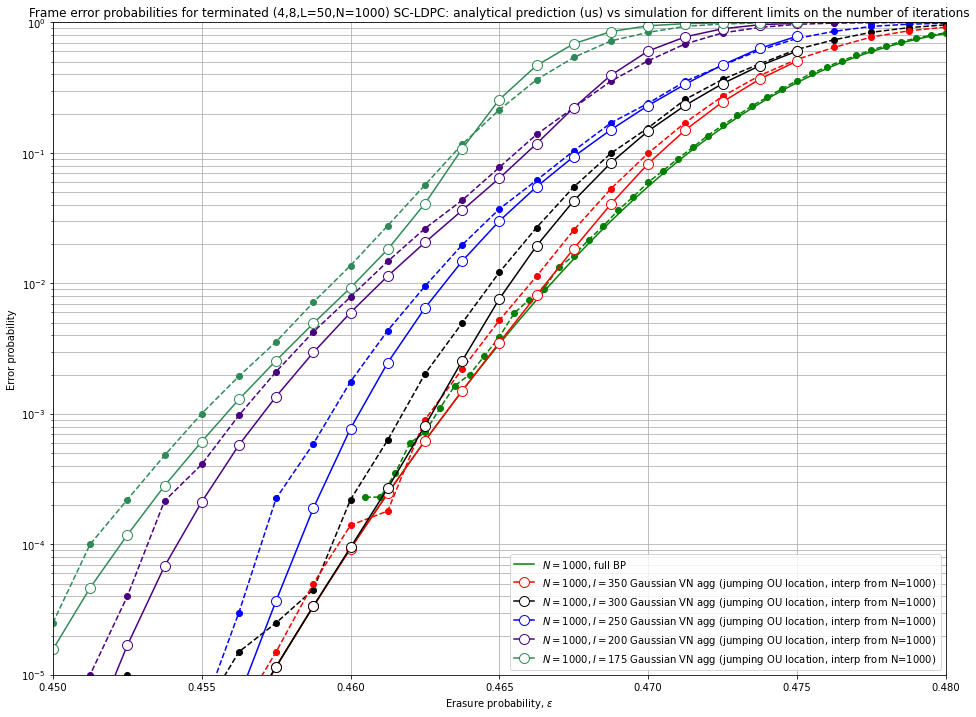

In [33]:
# 175 iterations
vals1000_175it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_175it_BEC.dat", unpack=True, skiprows=2)
xsim1000_175it = vals1000_175it[0]
bersim1000_175it = vals1000_175it[4]
fersim1000_175it = vals1000_175it[5]
blersim1000_175it = vals1000_175it[6]


# 200 iterations
vals1000_200it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_200it_BEC.dat", unpack=True, skiprows=2)
xsim1000_200it = vals1000_200it[0]
bersim1000_200it = vals1000_200it[4]
fersim1000_200it = vals1000_200it[5]
blersim1000_200it = vals1000_200it[6]

# 250 iterations
vals1000_250it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_250it_BEC.dat", unpack=True, skiprows=2)
xsim1000_250it = vals1000_250it[0]
bersim1000_250it = vals1000_250it[4]
fersim1000_250it = vals1000_250it[5]
blersim1000_250it = vals1000_250it[6]

# 300 iterations
vals1000_300it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_300it_BEC.dat", unpack=True, skiprows=2)
xsim1000_300it = vals1000_300it[0]
bersim1000_300it = vals1000_300it[4]
fersim1000_300it = vals1000_300it[5]
blersim1000_300it = vals1000_300it[6]

# 350 iterations
vals1000_350it = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_M500_BP_Full_350it_BEC.dat", unpack=True, skiprows=2)
xsim1000_350it = vals1000_350it[0]
bersim1000_350it = vals1000_350it[4]
fersim1000_350it = vals1000_350it[5]
blersim1000_350it = vals1000_350it[6]

plt.figure(figsize=(16,12))

start = 0.45
stop = 0.48

x = np.linspace(start, stop, 100)
fer1k_full = np.array([ fer_term_4_8(e, 1000, 50) for e in x])
plt.semilogy(x, fer1k_full, 'g-', label='$N = 1000$, full BP')

plt.semilogy(es_1000_upd, fer_1000_exp_upd, 'g--o')

plt.semilogy(xsim1000_175it, fersim1000_175it, '--o', color='seagreen')
plt.semilogy(xsim1000_200it, fersim1000_200it, '--o', color='indigo')
plt.semilogy(xsim1000_250it, fersim1000_250it, '--o', color='b')
plt.semilogy(xsim1000_300it, fersim1000_300it, '--o', color='k')
plt.semilogy(xsim1000_350it, fersim1000_350it, '--o', color='r')

# # GAUSSIAN MODEL WITH LOCATION FROM THE SIMULATED JUMPING OU PD PROCESS (INTERPOLATED FOR I AND INDEPENDENT OF N)
# # Uncomment and execute the cell to generate the file below.
# from fl_scaling.scaling_laws_full_BP_lim_iter import pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp
# start = 0.45
# stop = 0.475
# x = np.linspace(start, stop, 5 * 4 + 1)
# fer1k_350it_min_ppd_vn_jumping_ou_loc = np.array([ pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 350, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, jumping_ou_locs_pd(g, 350)) for g in x])
# fer1k_300it_min_ppd_vn_jumping_ou_loc = np.array([ pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 300, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, jumping_ou_locs_pd(g, 300)) for g in x])
# fer1k_250it_min_ppd_vn_jumping_ou_loc = np.array([ pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 250, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, jumping_ou_locs_pd(g, 250)) for g in x])
# fer1k_200it_min_ppd_vn_jumping_ou_loc = np.array([ pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 200, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, jumping_ou_locs_pd(g, 200)) for g in x])
# fer1k_175it_min_ppd_vn_jumping_ou_loc = np.array([ pb_term_bec_lim_iter_min_ppd_vn_jumping_ou_loc_interp(g, gammaf(g), nu, theta, gstar, taustar(g), endstar(g), 1000, L, 175, taustar_interp_ldpc_term_ppd_vn(g), collapse_interp_ldpc_term_ppd_vn(g), endstar_interp_ldpc_term_ppd_vn(g), gammaf_ppd_vn(g), nu_ppd_vn, theta_ppd_vn, jumping_ou_locs_pd(g, 175)) for g in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_min_gaussian_ppd_vn_jumping_ou_loc_ours_interp_pd_bounds.dat",\
#     np.c_[x,\
#           fer1k_350it_min_ppd_vn_jumping_ou_loc,\
#           fer1k_300it_min_ppd_vn_jumping_ou_loc,\
#           fer1k_250it_min_ppd_vn_jumping_ou_loc,\
#           fer1k_200it_min_ppd_vn_jumping_ou_loc,\
#           fer1k_175it_min_ppd_vn_jumping_ou_loc],\
#     header='epsilon fer_350it fer_300it fer_250it fer_200it fer_175it')
x,\
    fer1k_350it_min_ppd_vn_jumping_ou_loc,\
    fer1k_300it_min_ppd_vn_jumping_ou_loc,\
    fer1k_250it_min_ppd_vn_jumping_ou_loc,\
    fer1k_200it_min_ppd_vn_jumping_ou_loc,\
    fer1k_175it_min_ppd_vn_jumping_ou_loc =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1k_lim_it_min_gaussian_ppd_vn_jumping_ou_loc_ours_interp_pd_bounds.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_350it_min_ppd_vn_jumping_ou_loc, 'r-o', markersize=10, mfc='white', label='$N = 1000, I=350$ Gaussian VN agg (jumping OU location, interp from N=1000)')
plt.semilogy(x, fer1k_300it_min_ppd_vn_jumping_ou_loc, 'k-o', markersize=10, mfc='white', label='$N = 1000, I=300$ Gaussian VN agg (jumping OU location, interp from N=1000)')
plt.semilogy(x, fer1k_250it_min_ppd_vn_jumping_ou_loc, 'b-o', markersize=10, mfc='white', label='$N = 1000, I=250$ Gaussian VN agg (jumping OU location, interp from N=1000)')
plt.semilogy(x, fer1k_200it_min_ppd_vn_jumping_ou_loc, '-o', color='indigo', markersize=10, mfc='white', label='$N = 1000, I=200$ Gaussian VN agg (jumping OU location, interp from N=1000)')
plt.semilogy(x, fer1k_175it_min_ppd_vn_jumping_ou_loc, '-o', color='seagreen', markersize=10, mfc='white', label='$N = 1000, I=175$ Gaussian VN agg (jumping OU location, interp from N=1000)')

plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("Frame error probabilities for terminated (4,8,L=50,N=1000) SC-LDPC: analytical prediction (us) vs simulation for different limits on the number of iterations")
plt.ylim(bottom=1e-5,top=1e0)
plt.xlim(left=0.45,right=0.48)
plt.grid(which='both')
plt.legend()
plt.show()

# Sliding Window with Limited Iterations
## Fokker-Planck prediction

The numerical solver of the Fokker-Planck equation for the integrated Ornstein-Uhlenbeck process with an additional diffusion term is implemented in `FiPy`. See [Configuring the environment](#Configuring-the-environment) above for instructions.


### Estimating extra positional variance (sigma_iou)

The trajectories needed for $\sigma_2$ (the additional diffusion term) are also already provided. They are also generated by `bp_traj`. The parameters need to be modified in the source code and in the calling command. The value estimated from these trajectories is hard-coded below, so if re-generating it is not needed, skip to the cell that generates the FERs [here](#Generating-the-Fokker-Planck-predictions) (or to the plot [here](#Sliding-window-decoding-with-limited-iterations:-Fokker-Planck-model-vs-simulations)).

In [34]:
from io import StringIO

def load_trajectories(e, N, L=100, num_files=(200,), pad_size=1000, invrate=2, dv=5, dc=10):
    tr_array_list_unt = []
    tr_vns_list_unt = []
    tr_erasure_pos_list_unt = []

    for i in range(*num_files):
        with open(f'sim_data/trajectories_bp_decoding/trajectories_{e:.4f}_truncated_SC_LDPC_{dv}_{dc}_L{L}_M{int(N/invrate)}_BP_Full_{pad_size}it_Random_BLER_{i}.dat', 'rt') as f_data:    
            for tr in f_data.read().split('\n\n'):
                if tr == "": continue
                tr_str = StringIO(tr)
                tr_iter, tr_arr, tr_vns, tr_erp = np.loadtxt(tr_str, unpack=True)
                tr_arr = np.pad(tr_arr, (0, pad_size - len(tr_arr)), mode="constant")
                tr_vns = np.pad(tr_vns, (0, pad_size - len(tr_vns)), mode="constant")
                tr_erp = np.pad(tr_erp, (0, pad_size - len(tr_erp)), mode="constant")
                tr_array_list_unt.append(tr_arr)
                tr_vns_list_unt.append(tr_vns)
                tr_erasure_pos_list_unt.append(tr_erp)

    tr_array_unt = np.vstack([tr for tr in tr_array_list_unt])
    tr_vns_unt = np.vstack([tr for tr in tr_vns_list_unt])
    tr_erp_unt = np.vstack([tr for tr in tr_erasure_pos_list_unt])

    return tr_vns_unt, tr_array_unt, tr_erp_unt

In [35]:
trajs_cache = {}

In [36]:
e = 0.455
N = 1000
pad_size = 1000
invrate = 2

if (e, N) in trajs_cache:
    print("FOUND THE TRAJECTORIES")
    tr_vns_unt, _, tr_erp_unt = trajs_cache[(e, N)]
else:
    if e == 0.47 and N == 1000:
        num_files = (200, 400)
    else:
        num_files = (200, )
    trs = load_trajectories(e, N, L=100, num_files=num_files, invrate=invrate, dv=4, dc=8)
    tr_vns_unt, _, tr_erp_unt = trs
    trajs_cache[(e, N)] = trs 

(99802, 216)
0.08333375181818332 0.08802462665853159
(100000, 217)


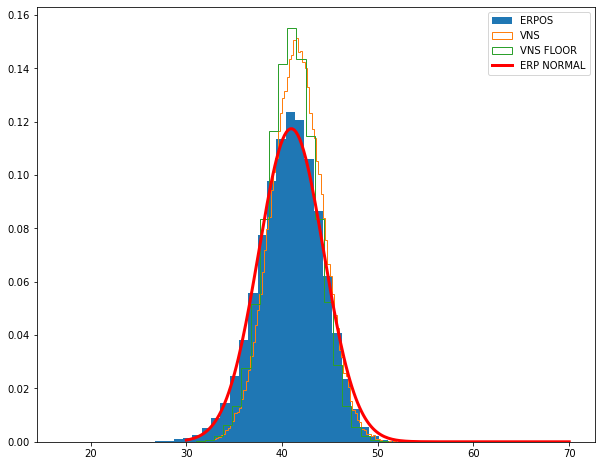

40.95647381815996 3.396924584678939
41.00261 2.7232890386259037
0.14216107693243296


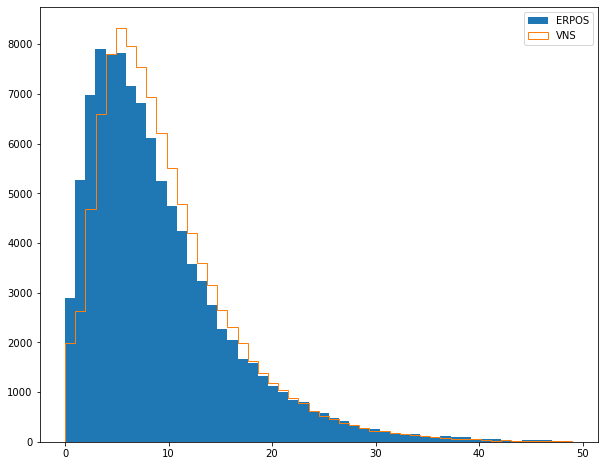

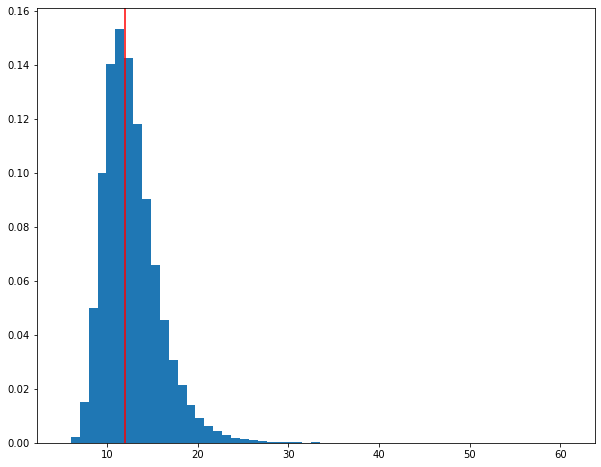

10.161850776254184


In [37]:
# Estimating the extra IOU diffusion term properly

numPos = 50
Iit = 4
Iinit = 20

num_iter = Iit * (numPos - 1) + Iinit

init_period = int(round(float(taustar_interp_ldpc_term_ppd_vn(e))))
#init_period_empirical = int(round(float(mean_taustar_empirical_f(e))))
#init_period = init_period_empirical

wave_speed = vss_interp_ldpc_term(e)  # PD
# wave_speed = wave_speed_f(e) / gammaf(e) / (gstar - e)  # PPD conversion
# wave_speed = wave_speeds_empirical_f(e) / gammaf(e) / (gstar - e)  # PPD conversion empirical
# wave_speed = wave_speeds_vns_empirical_f(e)  # mean nVns to erpos conversion empirical

tr_erp_survivors = tr_erp_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter]
one_index = np.argmax(tr_erp_survivors >= 1, axis=1)
print(tr_erp_survivors.shape)

positions_erpos = tr_erp_survivors[:, num_iter - 1]

failed_pos_erp = []
failed = 0
total = len(tr_erp_survivors)
for tr in tr_erp_survivors:
    itr = 0
    for i in range(numPos):
        numit = Iinit if i == 0 else Iit
        for it in range(numit):
            pos = tr[itr]
            itr += 1
        if pos < i + 1: # and i > 0:  # does not count the errors in the first position as errors
            failed += 1
            failed_pos_erp.append(i)
            break

posInit = 1

tr_vns_unt_ss = tr_vns_unt[:, init_period : ]
Iinit_ss = Iinit - init_period
num_iter = Iit * (numPos - 1) + Iinit_ss
num_iter_ss = Iit * (numPos - 1) + Iinit_ss

numPos = L
num_iter = Iit * (numPos - 1) + Iinit
from fl_scaling.scaling_laws_sw_lim_iter import sim_ou_trajectories_ppd
#tr_vns_unt_survivors_emp = tr_vns_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter + 50] / N
#loc_empirical = np.mean(tr_vns_unt_survivors_emp[:, init_period * 3 : num_iter])
tr_vns_survivors = tr_vns_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter]
loc_empirical = np.mean(tr_vns_survivors[:,int(round(float(taustar_interp_ldpc_term_ppd_vn(e)))) * 2 : num_iter]) / N
#loc_empirical = locs_empirical[e]
print(loc_empirical, gammaf_ppd_vn(e) * (gstar - e))
#print(loc_empirical, loc(e), gammaf_ppd_vn(e) * (gstar - e))
trajectories_ss, hit_times = sim_ou_trajectories_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn, gstar, N, num_iter + 1, None, loc_empirical, ntrials=100000)

trajectories_ou_ppd = []

for i, tr in enumerate(trajectories_ss):
    abort = False
    traj_ou_ppd = np.zeros(num_iter)
    for it in range(num_iter):
        if it >= hit_times[i]:
            abort = True
            break
        else:
            cur_val = tr[it]
            traj_ou_ppd[it] = cur_val
    if not abort:
        trajectories_ou_ppd.append(traj_ou_ppd)

# USING OU SIMULATED TRAJECTORIES INSTEAD OF THE REAL ONES
#trajectories_ou_ppd = np.array(trajectories_ou_ppd)  # Only the survivors
trajectories_ou_ppd = trajectories_ss  # All of them

tr_vns_unt_ss_survivors = trajectories_ou_ppd
print(tr_vns_unt_ss_survivors.shape)


positions_vns = []
for tr in tr_vns_unt_ss_survivors:
    pos = posInit
    itr = 0
    for it in range(num_iter_ss):
        #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = 0.1166)
        #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = scale)
        pos += wave_speed * tr[itr]
        itr += 1
    positions_vns.append(pos)

failed_pos = []
failed = 0
total = len(tr_vns_unt_ss_survivors)
#total = len(tr_vns_unt_survivors)
tr_index = 0
for tr in tr_vns_unt_ss_survivors:
    pos = posInit
    itr = 0
    # Iinit_ss_rnd = Iinit_ss + np.random.normal(loc = 0, scale = np.sqrt(9.123418410141348))  # from the simulations
    # Iinit_ss_rnd = Iinit - model_Iinit.sample()[0,0]  # KernelDensity generator
    Iinit_ss_rnd = Iinit - np.random.choice(one_index) # Directly from ERP simulations
    # Iinit_ss_rnd = Iinit - one_index[tr_index] # Directly from ERP simulations ! for the same trajectory ! 
    # A completely coupled system. The steady state is different for different trajectories;
    # the wave_speed game begins from the iteration when this specific trajectory is at pos 1. 
    #tr_ss = tr[one_index[tr_index] : ]
    #tr_ss = tr[init_period : ]
    tr_index += 1
    for i in range(numPos):
        numit = int(Iinit_ss_rnd) if i == 0 else Iit
        if numit < 0:
            failed += 1
            failed_pos.append(i)
            break
        for it in range(numit):
            #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = 0.1166)
            #pos += wave_speed * tr_ss[itr] + np.random.normal(loc = 0, scale = 0.1166)

            #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = scale)
            pos += wave_speed * tr[itr]
            itr += 1
        if pos < i + 1:
            failed += 1
            failed_pos.append(i)
            break

positions_vns_floor = [int(pos) for pos in positions_vns]

plt.figure(figsize=(10, 8))
plt.hist(positions_erpos, density=True, bins=int(np.max(positions_erpos) - np.min(positions_erpos) + 1), label="ERPOS")
plt.hist(positions_vns, density=True, bins=100, histtype="step", label="VNS")
plt.hist(positions_vns_floor, density=True, bins=int(np.max(positions_vns_floor) - np.min(positions_vns_floor) + 1), histtype="step", label="VNS FLOOR")
mean_pos_erp = np.mean(positions_erpos)
scale_pos_erp = np.std(positions_erpos)
erp_gaussian_x = np.linspace(30, 70, 200)
erp_gaussian_pdf = stats.norm.pdf(erp_gaussian_x, loc=mean_pos_erp, scale=scale_pos_erp)
plt.plot(erp_gaussian_x, erp_gaussian_pdf, linewidth=3, color="red", label="ERP NORMAL")
plt.legend()
plt.show()

print(np.mean(positions_erpos), np.std(positions_erpos))
print(np.mean(positions_vns_floor), np.std(positions_vns_floor))

#loc_correction_per_iter = np.sqrt((np.var(positions_erpos) - np.var(positions_vns_floor)) / Iinit_ss)
loc_correction_per_iter = np.sqrt((np.var(positions_erpos) - np.var(positions_vns_floor)) / num_iter_ss)
print(loc_correction_per_iter)
#print(np.random.normal(loc=0, scale=loc_correction_per_iter))

plt.figure(figsize=(10, 8))
plt.hist(failed_pos_erp, bins=int(np.max(failed_pos_erp) - np.min(failed_pos_erp) + 1), label="ERPOS")
plt.hist(failed_pos, bins=int(np.max(failed_pos) - np.min(failed_pos) + 1), histtype="step", label="VNS")
plt.legend()
plt.show()


# Checking the variance in the number of iterations it takes to move out of position 0
plt.figure(figsize=(10, 8))
one_index = np.argmax(tr_erp_survivors >= 1, axis=1)
plt.hist(one_index, bins=int(np.max(one_index) - np.min(one_index) + 1), density=True)
#plt.axvline(x=init_period_empirical, color='red')
plt.axvline(x=init_period, color='red')
plt.show()

print(np.var(one_index))

In [38]:
print(loc_correction_per_iter)

0.14216107693243296


(99802, 216)
0.08333375181818332 0.08802462665853159
(100000, 217)


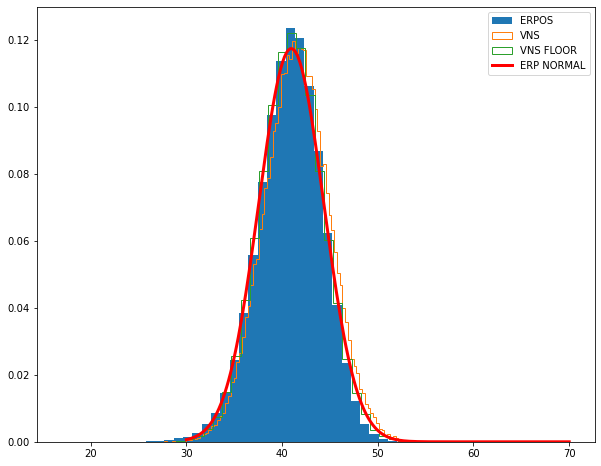

40.95647381815996 3.396924584678939
40.99883 3.406324798239299
nan


/var/folders/2_/ggtxz_kn6gn7z_rcqflg7px00000gn/T/ipykernel_20160/2346249924.py:146: RuntimeWarning: invalid value encountered in sqrt
  loc_correction_per_iter = np.sqrt((np.var(positions_erpos) - np.var(positions_vns_floor)) / num_iter_ss)


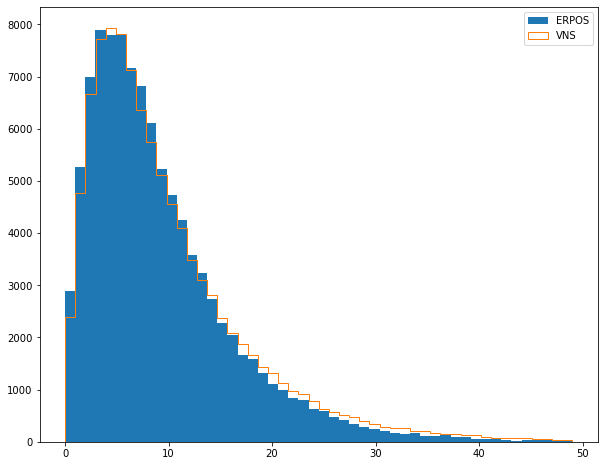

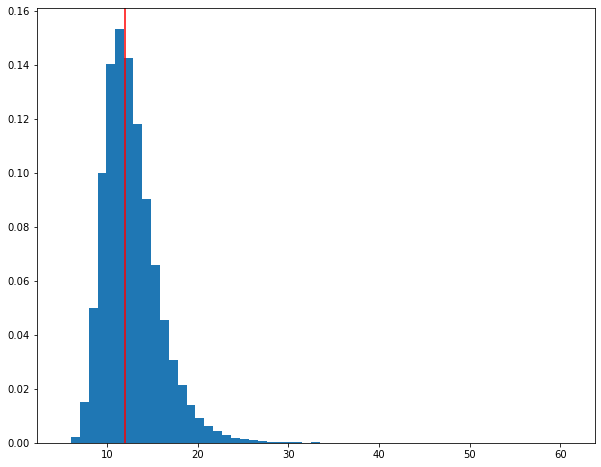

10.161850776254184


In [39]:
# Using the estimated correction above to see if the distribution matches now

numPos = 50
Iit = 4
Iinit = 20

num_iter = Iit * (numPos - 1) + Iinit

init_period = int(round(float(taustar_interp_ldpc_term_ppd_vn(e))))
#init_period_empirical = int(round(float(mean_taustar_empirical_f(e))))
#init_period = init_period_empirical

wave_speed = vss_interp_ldpc_term(e)  # PD
# wave_speed = wave_speed_f(e) / gammaf(e) / (gstar - e)  # PPD conversion
# wave_speed = wave_speeds_empirical_f(e) / gammaf(e) / (gstar - e)  # PPD conversion empirical
# wave_speed = wave_speeds_vns_empirical_f(e)  # mean nVns to erpos conversion empirical

tr_erp_survivors = tr_erp_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter]
one_index = np.argmax(tr_erp_survivors >= 1, axis=1)
print(tr_erp_survivors.shape)

positions_erpos = tr_erp_survivors[:, num_iter - 1]

failed_pos_erp = []
failed = 0
total = len(tr_erp_survivors)
for tr in tr_erp_survivors:
    itr = 0
    for i in range(numPos):
        numit = Iinit if i == 0 else Iit
        for it in range(numit):
            pos = tr[itr]
            itr += 1
        if pos < i + 1: # and i > 0:  # does not count the errors in the first position as errors
            failed += 1
            failed_pos_erp.append(i)
            break

posInit = 1

tr_vns_unt_ss = tr_vns_unt[:, init_period : ]
Iinit_ss = Iinit - init_period
num_iter = Iit * (numPos - 1) + Iinit_ss
num_iter_ss = Iit * (numPos - 1) + Iinit_ss

numPos = L
num_iter = Iit * (numPos - 1) + Iinit
from fl_scaling.scaling_laws_sw_lim_iter import sim_ou_trajectories_ppd
#tr_vns_unt_survivors_emp = tr_vns_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter + 50] / N
#loc_empirical = np.mean(tr_vns_unt_survivors_emp[:, init_period * 3 : num_iter])
tr_vns_survivors = tr_vns_unt[tr_vns_unt[:,num_iter - 1] != 0, 0:num_iter]
loc_empirical = np.mean(tr_vns_survivors[:,int(round(float(taustar_interp_ldpc_term_ppd_vn(e)))) * 2 : num_iter]) / N
#loc_empirical = locs_empirical[e]
print(loc_empirical, gammaf_ppd_vn(e) * (gstar - e))
#print(loc_empirical, loc(e), gammaf_ppd_vn(e) * (gstar - e))
trajectories_ss, hit_times = sim_ou_trajectories_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn, gstar, N, num_iter + 1, None, loc_empirical, ntrials=100000)
scale = 0.14296856095673657

trajectories_ou_ppd = []

for i, tr in enumerate(trajectories_ss):
    abort = False
    traj_ou_ppd = np.zeros(num_iter)
    for it in range(num_iter):
        if it >= hit_times[i]:
            abort = True
            break
        else:
            cur_val = tr[it]
            traj_ou_ppd[it] = cur_val
    if not abort:
        trajectories_ou_ppd.append(traj_ou_ppd)

# USING OU SIMULATED TRAJECTORIES INSTEAD OF THE REAL ONES
#trajectories_ou_ppd = np.array(trajectories_ou_ppd)  # Only the survivors
trajectories_ou_ppd = trajectories_ss  # All of them

tr_vns_unt_ss_survivors = trajectories_ou_ppd
print(tr_vns_unt_ss_survivors.shape)


positions_vns = []
for tr in tr_vns_unt_ss_survivors:
    pos = posInit
    itr = 0
    for it in range(num_iter_ss):
        #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = 0.1166)
        pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = scale)
        #pos += wave_speed * tr[itr]
        itr += 1
    positions_vns.append(pos)

failed_pos = []
failed = 0
total = len(tr_vns_unt_ss_survivors)
#total = len(tr_vns_unt_survivors)
tr_index = 0
for tr in tr_vns_unt_ss_survivors:
    pos = posInit
    itr = 0
    # Iinit_ss_rnd = Iinit_ss + np.random.normal(loc = 0, scale = np.sqrt(9.123418410141348))  # from the simulations
    # Iinit_ss_rnd = Iinit - model_Iinit.sample()[0,0]  # KernelDensity generator
    Iinit_ss_rnd = Iinit - np.random.choice(one_index) # Directly from ERP simulations
    # Iinit_ss_rnd = Iinit - one_index[tr_index] # Directly from ERP simulations ! for the same trajectory ! 
    # A completely coupled system. The steady state is different for different trajectories;
    # the wave_speed game begins from the iteration when this specific trajectory is at pos 1. 
    #tr_ss = tr[one_index[tr_index] : ]
    #tr_ss = tr[init_period : ]
    tr_index += 1
    for i in range(numPos):
        numit = int(Iinit_ss_rnd) if i == 0 else Iit
        if numit < 0:
            failed += 1
            failed_pos.append(i)
            break
        for it in range(numit):
            #pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = 0.1166)
            #pos += wave_speed * tr_ss[itr] + np.random.normal(loc = 0, scale = 0.1166)

            pos += wave_speed * tr[itr] + np.random.normal(loc = 0, scale = scale)
            #pos += wave_speed * tr[itr]
            itr += 1
        if pos < i + 1:
            failed += 1
            failed_pos.append(i)
            break

positions_vns_floor = [int(pos) for pos in positions_vns]

plt.figure(figsize=(10, 8))
plt.hist(positions_erpos, density=True, bins=int(np.max(positions_erpos) - np.min(positions_erpos) + 1), label="ERPOS")
plt.hist(positions_vns, density=True, bins=100, histtype="step", label="VNS")
plt.hist(positions_vns_floor, density=True, bins=int(np.max(positions_vns_floor) - np.min(positions_vns_floor) + 1), histtype="step", label="VNS FLOOR")
mean_pos_erp = np.mean(positions_erpos)
scale_pos_erp = np.std(positions_erpos)
erp_gaussian_x = np.linspace(30, 70, 200)
erp_gaussian_pdf = stats.norm.pdf(erp_gaussian_x, loc=mean_pos_erp, scale=scale_pos_erp)
plt.plot(erp_gaussian_x, erp_gaussian_pdf, linewidth=3, color="red", label="ERP NORMAL")
plt.legend()
plt.show()

print(np.mean(positions_erpos), np.std(positions_erpos))
print(np.mean(positions_vns_floor), np.std(positions_vns_floor))

#loc_correction_per_iter = np.sqrt((np.var(positions_erpos) - np.var(positions_vns_floor)) / Iinit_ss)
loc_correction_per_iter = np.sqrt((np.var(positions_erpos) - np.var(positions_vns_floor)) / num_iter_ss)
print(loc_correction_per_iter)
#print(np.random.normal(loc=0, scale=loc_correction_per_iter))

plt.figure(figsize=(10, 8))
plt.hist(failed_pos_erp, bins=int(np.max(failed_pos_erp) - np.min(failed_pos_erp) + 1), label="ERPOS")
plt.hist(failed_pos, bins=int(np.max(failed_pos) - np.min(failed_pos) + 1), histtype="step", label="VNS")
plt.legend()
plt.show()


# Checking the variance in the number of iterations it takes to move out of position 0
plt.figure(figsize=(10, 8))
one_index = np.argmax(tr_erp_survivors >= 1, axis=1)
plt.hist(one_index, bins=int(np.max(one_index) - np.min(one_index) + 1), density=True)
#plt.axvline(x=init_period_empirical, color='red')
plt.axvline(x=init_period, color='red')
plt.show()

print(np.var(one_index))

FOUND THE TRAJECTORIES


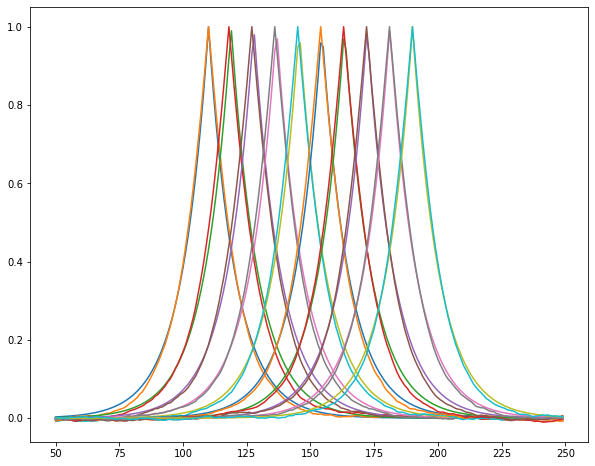

2.66813982520188 2.2286799129690467


In [40]:
from fl_scaling.est_scaling_params import calc_theta_explicit_ss_bounds_ppd

e = 0.455
N = 1000
pad_size = 1000
invrate = 2

if (e, N) in trajs_cache:
    print("FOUND THE TRAJECTORIES")
    tr_vns_unt, _, tr_erp_unt = trajs_cache[(e, N)]
else:
    if e == 0.47 and N == 1000:
        num_files = (200, 400)
    else:
        num_files = (200, )
    trs = load_trajectories(e, N, L=100, num_files=num_files, invrate=invrate, dv=4, dc=8)
    tr_vns_unt, _, tr_erp_unt = trs
    trajs_cache[(e, N)] = trs 

plt.figure(figsize=(10, 8))
theta_calc_0455_1k = calc_theta_explicit_ss_bounds_ppd(tr_vns_unt, 50, 250, N)
print(theta_ppd_vn, theta_calc_0455_1k / (gstar - e))

Note: the scaling law code for the Fokker-Planck model below takes up an insane amount of RAM. On my current Macbook Pro 2022 with the M2 chip, it kills the kernel. This wasn't the case for my previous laptop, Macbook Pro 2017 with the Intel chip (I no longer have access to that laptop). The data provided in this repository are generated using the previous laptop. The repository will be updated once I find a way to plug the memory leak. (The code for the scaling law is available in `fl_scaling.scaling_laws_sw_lim_iter`.)

Uncomment and execute the code below to generate the files used in the plot further down.

## Generating the Fokker-Planck predictions

In [41]:
# from fl_scaling.scaling_laws_sw_lim_iter import calc_w_eff_lim_iter, fer_sw_lim_iter_from_fokker_planck_ou_ppd
# ## a nice-looking progress bar for Jupyter notebooks. Does not work with my current installation for some reason.
# ## pass as an optional argument to 'fer_sw_lim_iter_from_fokker_planck_ou_ppd' as 'therange=tnrange'.
# #from tqdm import tnrange

# #theta_ppd_vn_adjusted = theta_calc_0455_1k / (gstar - 0.455)
# theta_ppd_vn_adjusted = 2.2286799129690467 # copied from theta_calc_0455_1k / (gstar - e) above
# scale = 0.14296856095673657 # copied from loc_correction_per_iter above.
# # NB: the procedure to obtain scaling (aka loc_correction_per_iter) is randomized;
# # each run generates a slightly different value.

# W = 20
# Iit = 6
# Iinit = 60
# N = 1000
# L = 50
# anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
# loc = lambda e: jumping_ou_locs_1000_350_pd(e) / anI_eff(350, e)
# it_ss = lambda e: taustar_interp_ldpc_term_ppd_vn(e) + collapse_interp_ldpc_term_ppd_vn(e)
# fer_ph2 = lambda e: fer_term_4_8(e, N, calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# fer_ph1_unlim = lambda e: fer_nonterm_4_8(e, N, L - calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# rho_ou_iou = 0.99
# x = [0.455, 0.4575, 0.46, 0.4625, 0.465, 0.4675, 0.47, 0.4725]
# fer1k_20sw_6it_60init_ppd_fp = np.array([fer_sw_lim_iter_from_fokker_planck_ou_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn_adjusted, gstar, fer_ph1_unlim(e), fer_ph2(e), N, L, W, Iit, Iinit, scale, taustar_interp_ldpc_term_ppd_vn(e), vss_interp_ldpc_term(e), loc=loc(e), rho=rho_ou_iou) for e in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_6it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat",\
#     np.c_[x,\
#           fer1k_20sw_6it_60init_ppd_fp],\
#     header='epsilon fer')
# # x,\
# #     fer1k_20sw_6it_60init_ppd_fp =\
# #         np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_6it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
# # plt.semilogy(x, fer1k_20sw_6it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=6, In=60)$')

# W = 20
# Iit = 7
# Iinit = 60
# N = 1000
# L = 50
# anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
# loc = lambda e: jumping_ou_locs_1000_350_pd(e) / anI_eff(350, e)
# it_ss = lambda e: taustar_interp_ldpc_term_ppd_vn(e) + collapse_interp_ldpc_term_ppd_vn(e)
# fer_ph2 = lambda e: fer_term_4_8(e, N, calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# fer_ph1_unlim = lambda e: fer_nonterm_4_8(e, N, L - calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# rho_ou_iou = 0.99
# x = [0.455, 0.4575, 0.46, 0.4625, 0.465, 0.4675, 0.47, 0.4725]
# fer1k_20sw_7it_60init_ppd_fp = np.array([fer_sw_lim_iter_from_fokker_planck_ou_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn_adjusted, gstar, fer_ph1_unlim(e), fer_ph2(e), N, L, W, Iit, Iinit, scale, taustar_interp_ldpc_term_ppd_vn(e), vss_interp_ldpc_term(e), loc=loc(e), rho=rho_ou_iou) for e in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_7it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat",\
#     np.c_[x,\
#           fer1k_20sw_7it_60init_ppd_fp],\
#     header='epsilon fer')
# # x,\
# #     fer1k_20sw_7it_60init_ppd_fp =\
# #         np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_7it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
# # plt.semilogy(x, fer1k_20sw_7it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=7, In=60)$')

# W = 20
# Iit = 8
# Iinit = 60
# N = 1000
# L = 50
# anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
# loc = lambda e: jumping_ou_locs_1000_350_pd(e) / anI_eff(350, e)
# it_ss = lambda e: taustar_interp_ldpc_term_ppd_vn(e) + collapse_interp_ldpc_term_ppd_vn(e)
# fer_ph2 = lambda e: fer_term_4_8(e, N, calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# fer_ph1_unlim = lambda e: fer_nonterm_4_8(e, N, L - calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# rho_ou_iou = 0.99
# x = [0.455, 0.4575, 0.46, 0.4625, 0.465, 0.4675, 0.47, 0.4725]
# fer1k_20sw_8it_60init_ppd_fp = np.array([fer_sw_lim_iter_from_fokker_planck_ou_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn_adjusted, gstar, fer_ph1_unlim(e), fer_ph2(e), N, L, W, Iit, Iinit, scale, taustar_interp_ldpc_term_ppd_vn(e), vss_interp_ldpc_term(e), loc=loc(e), rho=rho_ou_iou) for e in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_8it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat",\
#     np.c_[x,\
#           fer1k_20sw_8it_60init_ppd_fp],\
#     header='epsilon fer')
# # x,\
# #     fer1k_20sw_8it_60init_ppd_fp =\
# #         np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_8it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
# # plt.semilogy(x, fer1k_20sw_8it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=8, In=60)$')

# W = 20
# Iit = 9
# Iinit = 60
# N = 1000
# L = 50
# anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
# loc = lambda e: jumping_ou_locs_1000_350_pd(e) / anI_eff(350, e)
# it_ss = lambda e: taustar_interp_ldpc_term_ppd_vn(e) + collapse_interp_ldpc_term_ppd_vn(e)
# fer_ph2 = lambda e: fer_term_4_8(e, N, calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# fer_ph1_unlim = lambda e: fer_nonterm_4_8(e, N, L - calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# rho_ou_iou = 0.99
# x = [0.455, 0.4575, 0.46, 0.4625, 0.465, 0.4675, 0.47, 0.4725]
# fer1k_20sw_9it_60init_ppd_fp = np.array([fer_sw_lim_iter_from_fokker_planck_ou_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn_adjusted, gstar, fer_ph1_unlim(e), fer_ph2(e), N, L, W, Iit, Iinit, scale, taustar_interp_ldpc_term_ppd_vn(e), vss_interp_ldpc_term(e), loc=loc(e), rho=rho_ou_iou) for e in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_9it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat",\
#     np.c_[x,\
#           fer1k_20sw_9it_60init_ppd_fp],\
#     header='epsilon fer')
# # x,\
# #     fer1k_20sw_9it_60init_ppd_fp =\
# #         np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_9it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
# # plt.semilogy(x, fer1k_20sw_9it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=9, In=60)$')

# W = 20
# Iit = 10
# Iinit = 60
# N = 1000
# L = 50
# anI_eff = lambda I, e: round(I - taustar_interp_ldpc_term_ppd_vn(e) - collapse_interp_ldpc_term_ppd_vn(e))
# loc = lambda e: jumping_ou_locs_1000_350_pd(e) / anI_eff(350, e)
# it_ss = lambda e: taustar_interp_ldpc_term_ppd_vn(e) + collapse_interp_ldpc_term_ppd_vn(e)
# fer_ph2 = lambda e: fer_term_4_8(e, N, calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# fer_ph1_unlim = lambda e: fer_nonterm_4_8(e, N, L - calc_w_eff_lim_iter(W, Iit, it_ss(e), wave_speed_f(e)))
# rho_ou_iou = 0.99
# x = [0.455, 0.4575, 0.46, 0.4625, 0.465, 0.4675, 0.47, 0.4725]
# fer1k_20sw_10it_60init_ppd_fp = np.array([fer_sw_lim_iter_from_fokker_planck_ou_ppd(e, gammaf_ppd_vn(e), nu_ppd_vn, theta_ppd_vn_adjusted, gstar, fer_ph1_unlim(e), fer_ph2(e), N, L, W, Iit, Iinit, scale, taustar_interp_ldpc_term_ppd_vn(e), vss_interp_ldpc_term(e), loc=loc(e), rho=rho_ou_iou) for e in x])
# np.savetxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_10it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat",\
#     np.c_[x,\
#           fer1k_20sw_10it_60init_ppd_fp],\
#     header='epsilon fer')
# # x,\
# #     fer1k_20sw_10it_60init_ppd_fp =\
# #         np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_10it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
# # plt.semilogy(x, fer1k_20sw_10it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=10, In=60)$')

## Simulating sliding window decoding with limited iterations

The simulated error rate files used below have already been generated. To obtain them, compile and run `bp_lim_iter` with appropriate arguments as described below.


After that, the code below can be run. It is written in such a way that many instances can be run (e.g., on a cluster), each generating its own output file, and these files can be combined with an `awk` script below.

The script below simulates 1000 transmissions for each $\epsilon$ only.

First, the code needs to be compiled (it's written in C):

```bash
$ cd simulators_sc_ldpc/bp_decoding
$ CC=gcc cmake -DCMAKE_BUILD_TYPE=Release . && make
```

Then, the simulator for full BP decoding with a limit on the number of iterations can be run:
```bash
$ ./sw_lim_iter 0 20 0 6 60
```
In this example, the first `0` is the index of the output file, `20` is the size of the sliding window, the next `0` indicates that no doping is used, `6` is the limit on the number of iterations _per position_, and `60` is the limit on the number of iterations _in the first position_. Other parameters are hard-coded: the ensemble is $(4,8,L=50,N=1000)$. The range of $\epsilon$ starts from $0.475$ down to $0.455$ as below. The output format is cluster-friendly: several instances with different indices can be run (e.g., on a SLURM cluster with the environmental variable `${SLURM_ARRAY_TASK_ID}`), and their results aggregated using the `awk` script provided below.

Once the individual files are generated (a single file generated above will do), their results can be combined using the script below (assuming the directory is `simulators_sc_ldpc/bp_decoding` as above):
```bash
$ awk 'BEGIN{print "p BER FER BLER BER_EXP FER_EXP BLER_EXP n L f users_err frame_err block_err users_err_exp frame_err_exp block_err_exp"}; FNR==1{next} {ns[$1]=$8; ls[$1]=$9; fs[$1]+=$10; users_err[$1]+=$11; frames_err[$1]+=$12; blocks_err[$1]+=$13; users_err_exp[$1]+=$14; frames_err_exp[$1]+=$15; blocks_err_exp[$1]+=$16} END{for (e in users_err) print e, users_err[e]/ns[e]/fs[e], frames_err[e]/fs[e], blocks_err[e]/ls[e]/fs[e], users_err_exp[e]/ns[e]/fs[e], frames_err_exp[e]/fs[e], blocks_err_exp[e]/ls[e]/fs[e], ns[e], ls[e], fs[e], users_err[e], frames_err[e], blocks_err[e], users_err_exp[e], frames_err_exp[e], blocks_err_exp[e]}' SC_LDPC_4_8_L50_M500_BP_SW20_6it_60init_Random_BLER_*.dat | sort -n -k1 > SC_LDPC_4_8_L50_N1000_BP_SW20_6it_60init_square_BEC_mine.dat
$ cp SC_LDPC_4_8_L50_N1000_BP_SW20_6it_60init_square_BEC_mine.dat ../../sim_data/error_rates
```

The data used for the plots below were generated on a cluster; the usage of the final script generated above is included below (commented out).

## Sliding window decoding with limited iterations: Fokker-Planck model vs simulations

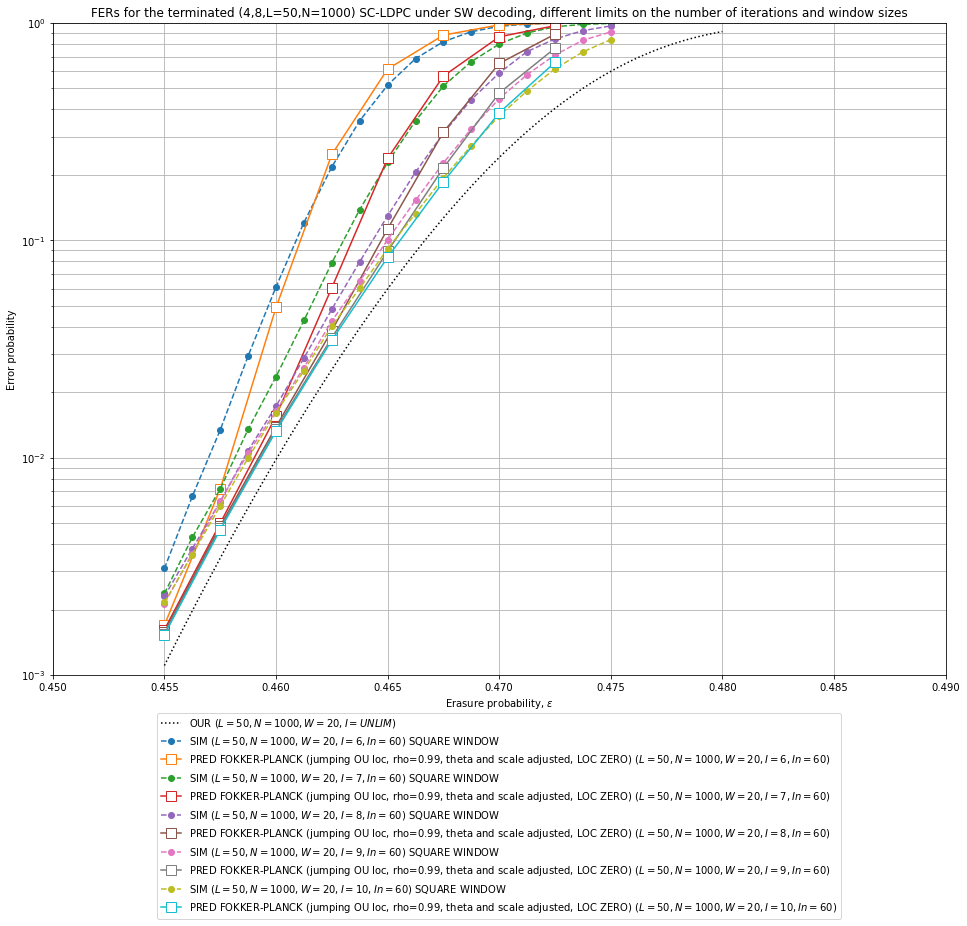

In [44]:
# 20 SW positions; 6 iterations per position; 60 initial iterations
# uncomment the line below and comment the line after to use the results generated above
# vals1000_20sw_6it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_6it_60init_square_BEC_mine.dat", unpack=True, skiprows=2)
vals1000_20sw_6it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_6it_60init_square_BEC.dat", unpack=True, skiprows=2)
xsim1000_20sw_6it_60init_square = vals1000_20sw_6it_60init_square[0]
bersim1000_20sw_6it_60init_square = vals1000_20sw_6it_60init_square[4]
fersim1000_20sw_6it_60init_square = vals1000_20sw_6it_60init_square[5]
blersim1000_20sw_6it_60init_square = vals1000_20sw_6it_60init_square[6]

# 20 SW positions; 7 iterations per position; 60 initial iterations
vals1000_20sw_7it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_7it_60init_square_BEC.dat", unpack=True, skiprows=2)
xsim1000_20sw_7it_60init_square = vals1000_20sw_7it_60init_square[0]
bersim1000_20sw_7it_60init_square = vals1000_20sw_7it_60init_square[4]
fersim1000_20sw_7it_60init_square = vals1000_20sw_7it_60init_square[5]
blersim1000_20sw_7it_60init_square = vals1000_20sw_7it_60init_square[6]

# 20 SW positions; 8 iterations per position; 60 initial iterations
vals1000_20sw_8it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_8it_60init_square_BEC.dat", unpack=True, skiprows=2)
xsim1000_20sw_8it_60init_square = vals1000_20sw_8it_60init_square[0]
bersim1000_20sw_8it_60init_square = vals1000_20sw_8it_60init_square[4]
fersim1000_20sw_8it_60init_square = vals1000_20sw_8it_60init_square[5]
blersim1000_20sw_8it_60init_square = vals1000_20sw_8it_60init_square[6]

# 20 SW positions; 9 iterations per position; 60 initial iterations
vals1000_20sw_9it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_9it_60init_square_BEC.dat", unpack=True, skiprows=2)
xsim1000_20sw_9it_60init_square = vals1000_20sw_9it_60init_square[0]
bersim1000_20sw_9it_60init_square = vals1000_20sw_9it_60init_square[4]
fersim1000_20sw_9it_60init_square = vals1000_20sw_9it_60init_square[5]
blersim1000_20sw_9it_60init_square = vals1000_20sw_9it_60init_square[6]

# 20 SW positions; 10 iterations per position; 60 initial iterations
vals1000_20sw_10it_60init_square = np.loadtxt("sim_data/error_rates/SC_LDPC_4_8_L50_N1000_BP_SW20_10it_60init_square_BEC.dat", unpack=True, skiprows=2)
xsim1000_20sw_10it_60init_square = vals1000_20sw_10it_60init_square[0]
bersim1000_20sw_10it_60init_square = vals1000_20sw_10it_60init_square[4]
fersim1000_20sw_10it_60init_square = vals1000_20sw_10it_60init_square[5]
blersim1000_20sw_10it_60init_square = vals1000_20sw_10it_60init_square[6]


start = 0.455
stop = 0.48
x_unlim = np.linspace(start, stop, 100)

perr50_wd20 = np.array([fer_term_4_8_wd(eps, 1000, L, 20) for eps in x_unlim])

plt.figure(figsize=(16,12))

plt.semilogy(x_unlim, perr50_wd20, 'k:', label='OUR $(L=50, N=1000, W=20, I=UNLIM)$')

plt.semilogy(xsim1000_20sw_6it_60init_square, fersim1000_20sw_6it_60init_square, '--o', label='SIM $(L=50, N=1000, W=20, I=6, In=60)$ SQUARE WINDOW')
x,\
    fer1k_20sw_6it_60init_ppd_fp =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_6it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_20sw_6it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=6, In=60)$')

plt.semilogy(xsim1000_20sw_7it_60init_square, fersim1000_20sw_7it_60init_square, '--o', label='SIM $(L=50, N=1000, W=20, I=7, In=60)$ SQUARE WINDOW')
x,\
    fer1k_20sw_7it_60init_ppd_fp =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_7it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_20sw_7it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=7, In=60)$')

plt.semilogy(xsim1000_20sw_8it_60init_square, fersim1000_20sw_8it_60init_square, '--o', label='SIM $(L=50, N=1000, W=20, I=8, In=60)$ SQUARE WINDOW')
x,\
    fer1k_20sw_8it_60init_ppd_fp =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_8it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_20sw_8it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=8, In=60)$')

plt.semilogy(xsim1000_20sw_9it_60init_square, fersim1000_20sw_9it_60init_square, '--o', label='SIM $(L=50, N=1000, W=20, I=9, In=60)$ SQUARE WINDOW')
x,\
    fer1k_20sw_9it_60init_ppd_fp =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_9it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_20sw_9it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=9, In=60)$')

plt.semilogy(xsim1000_20sw_10it_60init_square, fersim1000_20sw_10it_60init_square, '--o', label='SIM $(L=50, N=1000, W=20, I=10, In=60)$ SQUARE WINDOW')
x,\
    fer1k_20sw_10it_60init_ppd_fp =\
        np.loadtxt("sim_data/error_rates/fer_4_8_50_1000_sw_lim_it_20sw_10it_60init_fokker_planck_jumping_loc_init_ZERO_and_pos_randomized_adj_theta_adjusted.dat", unpack=True, skiprows=1)
plt.semilogy(x, fer1k_20sw_10it_60init_ppd_fp, '-s', markersize=10, mfc='white', label='PRED FOKKER-PLANCK (jumping OU loc, rho=0.99, theta and scale adjusted, LOC ZERO) $(L=50, N=1000, W=20, I=10, In=60)$')

plt.ylabel("Error probability")
plt.xlabel("Erasure probability, $\epsilon$")
plt.title("FERs for the terminated (4,8,L=50,N=1000) SC-LDPC under SW decoding, different limits on the number of iterations and window sizes")
plt.ylim(bottom=1e-3,top=1e0)
plt.xlim(left=0.45,right=0.49)
plt.grid(which='both')
#plt.legend(loc='lower right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()